In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [11]:
fashion_mnist= keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [12]:
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [13]:
print(y_train.shape)

(60000,)


In [14]:
X_train=X_train.reshape(-1, 28,28,1)
X_test=X_test.reshape(-1, 28,28,1)

In [15]:
print(X_train.shape)

(60000, 28, 28, 1)


In [19]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [31]:
def build_model(hp):
    model=Sequential()
    model.add(Conv2D(
              filters=hp.Int("conv_1_filter",64,128,16),
              kernel_size=hp.Choice("conv_1_kernel", values=[3,5]),
              activation='relu',
              input_shape=(28,28,1)
             ))
    model.add(Conv2D(
            filters=hp.Int("conv_2_filter",32,64,16),
            kernel_size=hp.Choice("conv_2_kernel", values=[3,5]),
            activation="relu"
    ))
    model.add(Flatten())
    model.add(Dense(
            units=hp.Int("dense_1_units",32,128,16),
            activation="relu"
    ))
    model.add(Dense(10, activation="softmax"))
    
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice("learning_rate", values=[1e-2, 1e-3])),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"]
                )
    return model

In [27]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [32]:
tuner_search=RandomSearch(build_model, objective="val_accuracy", max_trials=5, directory="output", project_name="fashion mnist")

In [33]:
tuner_search.search(X_train, y_train, epochs=3, validation_split=0.1)

Epoch 1/3


 186/1688 [==>...........................] - ETA: 0s - loss: 2.3100 - accuracy: 0.21 - ETA: 56s - loss: 6.3299 - accuracy: 0.156 - ETA: 1:19 - loss: 5.1390 - accuracy: 0.18 - ETA: 1:26 - loss: 4.5036 - accuracy: 0.16 - ETA: 1:27 - loss: 4.0468 - accuracy: 0.16 - ETA: 1:38 - loss: 3.8053 - accuracy: 0.19 - ETA: 1:39 - loss: 3.6414 - accuracy: 0.18 - ETA: 1:42 - loss: 3.4832 - accuracy: 0.17 - ETA: 1:42 - loss: 3.3274 - accuracy: 0.19 - ETA: 1:42 - loss: 3.2047 - accuracy: 0.21 - ETA: 1:44 - loss: 3.0968 - accuracy: 0.22 - ETA: 1:44 - loss: 3.0012 - accuracy: 0.23 - ETA: 1:45 - loss: 2.9322 - accuracy: 0.22 - ETA: 1:46 - loss: 2.8447 - accuracy: 0.23 - ETA: 1:46 - loss: 2.7562 - accuracy: 0.25 - ETA: 1:47 - loss: 2.6782 - accuracy: 0.26 - ETA: 1:47 - loss: 2.5902 - accuracy: 0.28 - ETA: 1:48 - loss: 2.5274 - accuracy: 0.29 - ETA: 1:48 - loss: 2.4533 - accuracy: 0.30 - ETA: 1:48 - loss: 2.4093 - accuracy: 0.32 - ETA: 1:48 - loss: 2.3382 - accuracy: 0.33 - ETA: 1:48 - loss: 2.2892 - accura

 930/1688 [===============>..............] - ETA: 1:03 - loss: 0.5628 - accuracy: 0.79 - ETA: 1:03 - loss: 0.5624 - accuracy: 0.79 - ETA: 1:03 - loss: 0.5623 - accuracy: 0.79 - ETA: 1:03 - loss: 0.5621 - accuracy: 0.79 - ETA: 1:03 - loss: 0.5617 - accuracy: 0.79 - ETA: 1:03 - loss: 0.5618 - accuracy: 0.79 - ETA: 1:03 - loss: 0.5620 - accuracy: 0.79 - ETA: 1:03 - loss: 0.5620 - accuracy: 0.79 - ETA: 1:03 - loss: 0.5622 - accuracy: 0.79 - ETA: 1:03 - loss: 0.5619 - accuracy: 0.79 - ETA: 1:02 - loss: 0.5619 - accuracy: 0.79 - ETA: 1:02 - loss: 0.5614 - accuracy: 0.79 - ETA: 1:02 - loss: 0.5611 - accuracy: 0.79 - ETA: 1:02 - loss: 0.5609 - accuracy: 0.79 - ETA: 1:02 - loss: 0.5609 - accuracy: 0.79 - ETA: 1:02 - loss: 0.5608 - accuracy: 0.79 - ETA: 1:02 - loss: 0.5605 - accuracy: 0.79 - ETA: 1:02 - loss: 0.5603 - accuracy: 0.79 - ETA: 1:02 - loss: 0.5599 - accuracy: 0.79 - ETA: 1:02 - loss: 0.5605 - accuracy: 0.79 - ETA: 1:02 - loss: 0.5601 - accuracy: 0.79 - ETA: 1:02 - loss: 0.5600 - accu

1116/1688 [==================>...........] - ETA: 51s - loss: 0.5308 - accuracy: 0.809 - ETA: 51s - loss: 0.5305 - accuracy: 0.809 - ETA: 51s - loss: 0.5302 - accuracy: 0.809 - ETA: 51s - loss: 0.5306 - accuracy: 0.809 - ETA: 51s - loss: 0.5303 - accuracy: 0.810 - ETA: 51s - loss: 0.5300 - accuracy: 0.810 - ETA: 50s - loss: 0.5298 - accuracy: 0.810 - ETA: 50s - loss: 0.5298 - accuracy: 0.810 - ETA: 50s - loss: 0.5300 - accuracy: 0.810 - ETA: 50s - loss: 0.5299 - accuracy: 0.810 - ETA: 50s - loss: 0.5295 - accuracy: 0.810 - ETA: 50s - loss: 0.5293 - accuracy: 0.810 - ETA: 50s - loss: 0.5290 - accuracy: 0.810 - ETA: 50s - loss: 0.5286 - accuracy: 0.810 - ETA: 50s - loss: 0.5285 - accuracy: 0.810 - ETA: 50s - loss: 0.5286 - accuracy: 0.810 - ETA: 50s - loss: 0.5284 - accuracy: 0.810 - ETA: 50s - loss: 0.5282 - accuracy: 0.810 - ETA: 50s - loss: 0.5280 - accuracy: 0.810 - ETA: 50s - loss: 0.5277 - accuracy: 0.810 - ETA: 50s - loss: 0.5274 - accuracy: 0.811 - ETA: 50s - loss: 0.5271 - accur

1302/1688 [======================>.......] - ETA: 38s - loss: 0.5109 - accuracy: 0.816 - ETA: 38s - loss: 0.5107 - accuracy: 0.816 - ETA: 38s - loss: 0.5106 - accuracy: 0.816 - ETA: 38s - loss: 0.5105 - accuracy: 0.816 - ETA: 38s - loss: 0.5103 - accuracy: 0.816 - ETA: 38s - loss: 0.5104 - accuracy: 0.816 - ETA: 38s - loss: 0.5101 - accuracy: 0.816 - ETA: 38s - loss: 0.5100 - accuracy: 0.816 - ETA: 38s - loss: 0.5097 - accuracy: 0.816 - ETA: 38s - loss: 0.5097 - accuracy: 0.816 - ETA: 38s - loss: 0.5097 - accuracy: 0.816 - ETA: 38s - loss: 0.5095 - accuracy: 0.816 - ETA: 37s - loss: 0.5095 - accuracy: 0.816 - ETA: 37s - loss: 0.5094 - accuracy: 0.816 - ETA: 37s - loss: 0.5091 - accuracy: 0.816 - ETA: 37s - loss: 0.5091 - accuracy: 0.817 - ETA: 37s - loss: 0.5090 - accuracy: 0.817 - ETA: 37s - loss: 0.5089 - accuracy: 0.817 - ETA: 37s - loss: 0.5088 - accuracy: 0.817 - ETA: 37s - loss: 0.5085 - accuracy: 0.817 - ETA: 37s - loss: 0.5085 - accuracy: 0.817 - ETA: 37s - loss: 0.5101 - accur

1488/1688 [=========================>....] - ETA: 26s - loss: 0.5023 - accuracy: 0.820 - ETA: 25s - loss: 0.5021 - accuracy: 0.820 - ETA: 25s - loss: 0.5021 - accuracy: 0.820 - ETA: 25s - loss: 0.5022 - accuracy: 0.820 - ETA: 25s - loss: 0.5020 - accuracy: 0.820 - ETA: 25s - loss: 0.5018 - accuracy: 0.820 - ETA: 25s - loss: 0.5016 - accuracy: 0.820 - ETA: 25s - loss: 0.5014 - accuracy: 0.820 - ETA: 25s - loss: 0.5014 - accuracy: 0.820 - ETA: 25s - loss: 0.5013 - accuracy: 0.820 - ETA: 25s - loss: 0.5011 - accuracy: 0.820 - ETA: 25s - loss: 0.5010 - accuracy: 0.820 - ETA: 25s - loss: 0.5010 - accuracy: 0.820 - ETA: 25s - loss: 0.5012 - accuracy: 0.820 - ETA: 25s - loss: 0.5010 - accuracy: 0.820 - ETA: 25s - loss: 0.5008 - accuracy: 0.820 - ETA: 24s - loss: 0.5005 - accuracy: 0.820 - ETA: 24s - loss: 0.5004 - accuracy: 0.820 - ETA: 24s - loss: 0.5004 - accuracy: 0.820 - ETA: 24s - loss: 0.5003 - accuracy: 0.820 - ETA: 24s - loss: 0.5003 - accuracy: 0.820 - ETA: 24s - loss: 0.5000 - accur

1680/1688 [============================>.] - ETA: 13s - loss: 0.4857 - accuracy: 0.825 - ETA: 13s - loss: 0.4856 - accuracy: 0.825 - ETA: 13s - loss: 0.4856 - accuracy: 0.825 - ETA: 13s - loss: 0.4856 - accuracy: 0.825 - ETA: 13s - loss: 0.4858 - accuracy: 0.825 - ETA: 13s - loss: 0.4857 - accuracy: 0.825 - ETA: 13s - loss: 0.4857 - accuracy: 0.825 - ETA: 12s - loss: 0.4858 - accuracy: 0.825 - ETA: 12s - loss: 0.4857 - accuracy: 0.825 - ETA: 12s - loss: 0.4857 - accuracy: 0.825 - ETA: 12s - loss: 0.4857 - accuracy: 0.825 - ETA: 12s - loss: 0.4856 - accuracy: 0.825 - ETA: 12s - loss: 0.4855 - accuracy: 0.825 - ETA: 12s - loss: 0.4854 - accuracy: 0.825 - ETA: 12s - loss: 0.4853 - accuracy: 0.825 - ETA: 12s - loss: 0.4851 - accuracy: 0.825 - ETA: 12s - loss: 0.4851 - accuracy: 0.825 - ETA: 12s - loss: 0.4852 - accuracy: 0.825 - ETA: 12s - loss: 0.4852 - accuracy: 0.825 - ETA: 12s - loss: 0.4853 - accuracy: 0.825 - ETA: 12s - loss: 0.4852 - accuracy: 0.825 - ETA: 12s - loss: 0.4853 - accur

1688/1688 [==============================] - ETA: 0s - loss: 0.4744 - accuracy: 0.82 - ETA: 0s - loss: 0.4743 - accuracy: 0.82 - ETA: 0s - loss: 0.4742 - accuracy: 0.82 - ETA: 0s - loss: 0.4742 - accuracy: 0.82 - ETA: 0s - loss: 0.4742 - accuracy: 0.82 - ETA: 0s - loss: 0.4741 - accuracy: 0.82 - ETA: 0s - loss: 0.4741 - accuracy: 0.82 - 117s 70ms/step - loss: 0.4740 - accuracy: 0.8296 - val_loss: 0.3852 - val_accuracy: 0.8628
Epoch 2/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.6097 - accuracy: 0.90 - ETA: 1:07 - loss: 0.4802 - accuracy: 0.87 - ETA: 1:30 - loss: 0.4609 - accuracy: 0.87 - ETA: 1:36 - loss: 0.4127 - accuracy: 0.88 - ETA: 1:39 - loss: 0.3892 - accuracy: 0.88 - ETA: 1:41 - loss: 0.3914 - accuracy: 0.88 - ETA: 1:42 - loss: 0.3892 - accuracy: 0.87 - ETA: 1:43 - loss: 0.4052 - accuracy: 0.87 - ETA: 1:45 - loss: 0.3933 - accuracy: 0.87 - ETA: 1:45 - loss: 0.3871 - accuracy: 0.87 - ETA: 1:45 - loss: 0.3989 - accuracy: 0.87 - ETA: 1:45 - loss: 0.3932 - accuracy: 0.87 - ETA: 1:46 - loss: 0.4129 - accuracy: 0.86 - ETA: 1:46 - loss: 0.4039 - accuracy: 0.87 - ETA: 1:46 - loss: 0.3876 - accuracy: 0.87 - ETA: 1:47 - loss: 0.3705 - accuracy: 0.88 - ETA: 1:46 - loss: 0.3649 - accuracy: 0.87 - ETA: 1:46 - loss: 0.3765 - accuracy: 0.87 - ETA: 1:46 - loss: 0.3675 - accuracy: 0.87 - ETA: 1:46 - loss: 0.3599 - accuracy: 0.87 - ETA: 1:46 - loss: 0.3572 - accuracy: 0.87 - ETA: 1:47 - loss: 0.3490 - accura

 932/1688 [===============>..............] - ETA: 1:03 - loss: 0.3545 - accuracy: 0.87 - ETA: 1:03 - loss: 0.3543 - accuracy: 0.87 - ETA: 1:03 - loss: 0.3543 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3544 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3541 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3543 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3541 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3543 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3542 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3544 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3545 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3544 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3547 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3546 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3548 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3548 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3546 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3546 - accuracy: 0.87 - ETA: 1:02 - loss: 0.3546 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3544 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3546 - accuracy: 0.87 - ETA: 1:01 - loss: 0.3547 - accu

1118/1688 [==================>...........] - ETA: 50s - loss: 0.3520 - accuracy: 0.871 - ETA: 50s - loss: 0.3522 - accuracy: 0.871 - ETA: 50s - loss: 0.3522 - accuracy: 0.871 - ETA: 50s - loss: 0.3522 - accuracy: 0.871 - ETA: 50s - loss: 0.3524 - accuracy: 0.871 - ETA: 50s - loss: 0.3527 - accuracy: 0.871 - ETA: 50s - loss: 0.3526 - accuracy: 0.871 - ETA: 50s - loss: 0.3527 - accuracy: 0.871 - ETA: 50s - loss: 0.3528 - accuracy: 0.871 - ETA: 50s - loss: 0.3527 - accuracy: 0.871 - ETA: 50s - loss: 0.3524 - accuracy: 0.871 - ETA: 50s - loss: 0.3525 - accuracy: 0.871 - ETA: 50s - loss: 0.3523 - accuracy: 0.871 - ETA: 50s - loss: 0.3528 - accuracy: 0.871 - ETA: 49s - loss: 0.3531 - accuracy: 0.871 - ETA: 49s - loss: 0.3535 - accuracy: 0.871 - ETA: 49s - loss: 0.3535 - accuracy: 0.871 - ETA: 49s - loss: 0.3533 - accuracy: 0.871 - ETA: 49s - loss: 0.3533 - accuracy: 0.871 - ETA: 49s - loss: 0.3533 - accuracy: 0.871 - ETA: 49s - loss: 0.3533 - accuracy: 0.871 - ETA: 49s - loss: 0.3532 - accur

1304/1688 [======================>.......] - ETA: 38s - loss: 0.3516 - accuracy: 0.871 - ETA: 38s - loss: 0.3518 - accuracy: 0.871 - ETA: 38s - loss: 0.3518 - accuracy: 0.871 - ETA: 38s - loss: 0.3519 - accuracy: 0.871 - ETA: 38s - loss: 0.3522 - accuracy: 0.871 - ETA: 38s - loss: 0.3521 - accuracy: 0.871 - ETA: 38s - loss: 0.3519 - accuracy: 0.871 - ETA: 37s - loss: 0.3519 - accuracy: 0.871 - ETA: 37s - loss: 0.3519 - accuracy: 0.871 - ETA: 37s - loss: 0.3519 - accuracy: 0.871 - ETA: 37s - loss: 0.3518 - accuracy: 0.871 - ETA: 37s - loss: 0.3518 - accuracy: 0.871 - ETA: 37s - loss: 0.3518 - accuracy: 0.871 - ETA: 37s - loss: 0.3517 - accuracy: 0.871 - ETA: 37s - loss: 0.3517 - accuracy: 0.871 - ETA: 37s - loss: 0.3517 - accuracy: 0.871 - ETA: 37s - loss: 0.3517 - accuracy: 0.871 - ETA: 37s - loss: 0.3518 - accuracy: 0.871 - ETA: 37s - loss: 0.3521 - accuracy: 0.871 - ETA: 37s - loss: 0.3522 - accuracy: 0.871 - ETA: 37s - loss: 0.3520 - accuracy: 0.871 - ETA: 37s - loss: 0.3519 - accur

1490/1688 [=========================>....] - ETA: 25s - loss: 0.3530 - accuracy: 0.871 - ETA: 25s - loss: 0.3531 - accuracy: 0.871 - ETA: 25s - loss: 0.3533 - accuracy: 0.871 - ETA: 25s - loss: 0.3532 - accuracy: 0.871 - ETA: 25s - loss: 0.3531 - accuracy: 0.871 - ETA: 25s - loss: 0.3530 - accuracy: 0.871 - ETA: 25s - loss: 0.3529 - accuracy: 0.871 - ETA: 25s - loss: 0.3528 - accuracy: 0.871 - ETA: 25s - loss: 0.3530 - accuracy: 0.871 - ETA: 25s - loss: 0.3532 - accuracy: 0.871 - ETA: 25s - loss: 0.3531 - accuracy: 0.871 - ETA: 25s - loss: 0.3532 - accuracy: 0.871 - ETA: 25s - loss: 0.3530 - accuracy: 0.871 - ETA: 24s - loss: 0.3532 - accuracy: 0.871 - ETA: 24s - loss: 0.3533 - accuracy: 0.871 - ETA: 24s - loss: 0.3532 - accuracy: 0.871 - ETA: 24s - loss: 0.3530 - accuracy: 0.871 - ETA: 24s - loss: 0.3529 - accuracy: 0.871 - ETA: 24s - loss: 0.3529 - accuracy: 0.871 - ETA: 24s - loss: 0.3528 - accuracy: 0.871 - ETA: 24s - loss: 0.3526 - accuracy: 0.871 - ETA: 24s - loss: 0.3527 - accur

1682/1688 [============================>.] - ETA: 13s - loss: 0.3513 - accuracy: 0.872 - ETA: 13s - loss: 0.3513 - accuracy: 0.872 - ETA: 13s - loss: 0.3515 - accuracy: 0.872 - ETA: 13s - loss: 0.3516 - accuracy: 0.872 - ETA: 12s - loss: 0.3516 - accuracy: 0.872 - ETA: 12s - loss: 0.3515 - accuracy: 0.872 - ETA: 12s - loss: 0.3514 - accuracy: 0.872 - ETA: 12s - loss: 0.3514 - accuracy: 0.872 - ETA: 12s - loss: 0.3514 - accuracy: 0.872 - ETA: 12s - loss: 0.3513 - accuracy: 0.872 - ETA: 12s - loss: 0.3513 - accuracy: 0.872 - ETA: 12s - loss: 0.3512 - accuracy: 0.872 - ETA: 12s - loss: 0.3511 - accuracy: 0.872 - ETA: 12s - loss: 0.3511 - accuracy: 0.872 - ETA: 12s - loss: 0.3510 - accuracy: 0.872 - ETA: 12s - loss: 0.3509 - accuracy: 0.872 - ETA: 12s - loss: 0.3510 - accuracy: 0.872 - ETA: 12s - loss: 0.3510 - accuracy: 0.872 - ETA: 12s - loss: 0.3510 - accuracy: 0.872 - ETA: 11s - loss: 0.3509 - accuracy: 0.872 - ETA: 11s - loss: 0.3508 - accuracy: 0.872 - ETA: 11s - loss: 0.3510 - accur

1688/1688 [==============================] - ETA: 0s - loss: 0.3522 - accuracy: 0.87 - ETA: 0s - loss: 0.3522 - accuracy: 0.87 - ETA: 0s - loss: 0.3521 - accuracy: 0.87 - ETA: 0s - loss: 0.3520 - accuracy: 0.87 - ETA: 0s - loss: 0.3519 - accuracy: 0.87 - 117s 69ms/step - loss: 0.3519 - accuracy: 0.8726 - val_loss: 0.4071 - val_accuracy: 0.8592
Epoch 3/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.84 - ETA: 57s - loss: 0.3306 - accuracy: 0.875 - ETA: 1:12 - loss: 0.2913 - accuracy: 0.87 - ETA: 1:24 - loss: 0.2764 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2977 - accuracy: 0.88 - ETA: 1:37 - loss: 0.3019 - accuracy: 0.87 - ETA: 1:41 - loss: 0.3382 - accuracy: 0.85 - ETA: 1:40 - loss: 0.3292 - accuracy: 0.86 - ETA: 1:44 - loss: 0.3316 - accuracy: 0.86 - ETA: 1:45 - loss: 0.3359 - accuracy: 0.86 - ETA: 1:45 - loss: 0.3230 - accuracy: 0.86 - ETA: 1:47 - loss: 0.3329 - accuracy: 0.86 - ETA: 1:48 - loss: 0.3250 - accuracy: 0.87 - ETA: 1:48 - loss: 0.3140 - accuracy: 0.87 - ETA: 1:50 - loss: 0.3333 - accuracy: 0.86 - ETA: 1:49 - loss: 0.3244 - accuracy: 0.87 - ETA: 1:50 - loss: 0.3153 - accuracy: 0.87 - ETA: 1:50 - loss: 0.3152 - accuracy: 0.87 - ETA: 1:50 - loss: 0.3110 - accuracy: 0.87 - ETA: 1:50 - loss: 0.3060 - accuracy: 0.88 - ETA: 1:50 - loss: 0.3135 - accuracy: 0.87 - ETA: 1:50 - loss: 0.3067 - accura

 930/1688 [===============>..............] - ETA: 1:04 - loss: 0.3102 - accuracy: 0.88 - ETA: 1:04 - loss: 0.3102 - accuracy: 0.88 - ETA: 1:04 - loss: 0.3103 - accuracy: 0.88 - ETA: 1:04 - loss: 0.3101 - accuracy: 0.88 - ETA: 1:04 - loss: 0.3099 - accuracy: 0.88 - ETA: 1:04 - loss: 0.3096 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3095 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3096 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3098 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3098 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3098 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3096 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3096 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3096 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3101 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3100 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3103 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3101 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3101 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3105 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3106 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3104 - accu

1116/1688 [==================>...........] - ETA: 51s - loss: 0.3104 - accuracy: 0.885 - ETA: 51s - loss: 0.3102 - accuracy: 0.885 - ETA: 51s - loss: 0.3101 - accuracy: 0.885 - ETA: 51s - loss: 0.3099 - accuracy: 0.885 - ETA: 51s - loss: 0.3100 - accuracy: 0.885 - ETA: 51s - loss: 0.3100 - accuracy: 0.885 - ETA: 51s - loss: 0.3098 - accuracy: 0.885 - ETA: 51s - loss: 0.3100 - accuracy: 0.885 - ETA: 51s - loss: 0.3102 - accuracy: 0.885 - ETA: 50s - loss: 0.3102 - accuracy: 0.885 - ETA: 50s - loss: 0.3106 - accuracy: 0.885 - ETA: 50s - loss: 0.3105 - accuracy: 0.885 - ETA: 50s - loss: 0.3107 - accuracy: 0.885 - ETA: 50s - loss: 0.3106 - accuracy: 0.885 - ETA: 50s - loss: 0.3108 - accuracy: 0.884 - ETA: 50s - loss: 0.3108 - accuracy: 0.884 - ETA: 50s - loss: 0.3106 - accuracy: 0.884 - ETA: 50s - loss: 0.3106 - accuracy: 0.884 - ETA: 50s - loss: 0.3108 - accuracy: 0.884 - ETA: 50s - loss: 0.3109 - accuracy: 0.884 - ETA: 50s - loss: 0.3111 - accuracy: 0.884 - ETA: 50s - loss: 0.3110 - accur

1302/1688 [======================>.......] - ETA: 38s - loss: 0.3141 - accuracy: 0.883 - ETA: 38s - loss: 0.3141 - accuracy: 0.883 - ETA: 38s - loss: 0.3140 - accuracy: 0.883 - ETA: 38s - loss: 0.3140 - accuracy: 0.883 - ETA: 38s - loss: 0.3140 - accuracy: 0.883 - ETA: 38s - loss: 0.3140 - accuracy: 0.883 - ETA: 38s - loss: 0.3139 - accuracy: 0.883 - ETA: 38s - loss: 0.3139 - accuracy: 0.883 - ETA: 38s - loss: 0.3140 - accuracy: 0.883 - ETA: 38s - loss: 0.3140 - accuracy: 0.883 - ETA: 38s - loss: 0.3140 - accuracy: 0.883 - ETA: 38s - loss: 0.3140 - accuracy: 0.883 - ETA: 38s - loss: 0.3143 - accuracy: 0.883 - ETA: 37s - loss: 0.3141 - accuracy: 0.883 - ETA: 37s - loss: 0.3139 - accuracy: 0.883 - ETA: 37s - loss: 0.3138 - accuracy: 0.883 - ETA: 37s - loss: 0.3138 - accuracy: 0.883 - ETA: 37s - loss: 0.3136 - accuracy: 0.883 - ETA: 37s - loss: 0.3136 - accuracy: 0.883 - ETA: 37s - loss: 0.3136 - accuracy: 0.883 - ETA: 37s - loss: 0.3136 - accuracy: 0.883 - ETA: 37s - loss: 0.3137 - accur

1488/1688 [=========================>....] - ETA: 26s - loss: 0.3158 - accuracy: 0.882 - ETA: 26s - loss: 0.3159 - accuracy: 0.882 - ETA: 26s - loss: 0.3158 - accuracy: 0.882 - ETA: 25s - loss: 0.3156 - accuracy: 0.882 - ETA: 25s - loss: 0.3156 - accuracy: 0.882 - ETA: 25s - loss: 0.3156 - accuracy: 0.882 - ETA: 25s - loss: 0.3156 - accuracy: 0.882 - ETA: 25s - loss: 0.3155 - accuracy: 0.882 - ETA: 25s - loss: 0.3155 - accuracy: 0.882 - ETA: 25s - loss: 0.3155 - accuracy: 0.882 - ETA: 25s - loss: 0.3157 - accuracy: 0.882 - ETA: 25s - loss: 0.3157 - accuracy: 0.882 - ETA: 25s - loss: 0.3159 - accuracy: 0.882 - ETA: 25s - loss: 0.3158 - accuracy: 0.882 - ETA: 25s - loss: 0.3158 - accuracy: 0.882 - ETA: 25s - loss: 0.3158 - accuracy: 0.882 - ETA: 25s - loss: 0.3159 - accuracy: 0.882 - ETA: 25s - loss: 0.3158 - accuracy: 0.882 - ETA: 24s - loss: 0.3158 - accuracy: 0.882 - ETA: 24s - loss: 0.3159 - accuracy: 0.882 - ETA: 24s - loss: 0.3159 - accuracy: 0.882 - ETA: 24s - loss: 0.3158 - accur

1680/1688 [============================>.] - ETA: 13s - loss: 0.3186 - accuracy: 0.882 - ETA: 13s - loss: 0.3185 - accuracy: 0.882 - ETA: 13s - loss: 0.3186 - accuracy: 0.882 - ETA: 13s - loss: 0.3187 - accuracy: 0.882 - ETA: 13s - loss: 0.3187 - accuracy: 0.882 - ETA: 13s - loss: 0.3186 - accuracy: 0.882 - ETA: 13s - loss: 0.3186 - accuracy: 0.882 - ETA: 13s - loss: 0.3187 - accuracy: 0.882 - ETA: 12s - loss: 0.3187 - accuracy: 0.882 - ETA: 12s - loss: 0.3186 - accuracy: 0.882 - ETA: 12s - loss: 0.3186 - accuracy: 0.882 - ETA: 12s - loss: 0.3187 - accuracy: 0.882 - ETA: 12s - loss: 0.3189 - accuracy: 0.882 - ETA: 12s - loss: 0.3189 - accuracy: 0.882 - ETA: 12s - loss: 0.3190 - accuracy: 0.882 - ETA: 12s - loss: 0.3190 - accuracy: 0.882 - ETA: 12s - loss: 0.3189 - accuracy: 0.882 - ETA: 12s - loss: 0.3188 - accuracy: 0.882 - ETA: 12s - loss: 0.3192 - accuracy: 0.882 - ETA: 12s - loss: 0.3192 - accuracy: 0.882 - ETA: 12s - loss: 0.3191 - accuracy: 0.882 - ETA: 12s - loss: 0.3192 - accur

1688/1688 [==============================] - ETA: 0s - loss: 0.3210 - accuracy: 0.88 - ETA: 0s - loss: 0.3210 - accuracy: 0.88 - ETA: 0s - loss: 0.3210 - accuracy: 0.88 - ETA: 0s - loss: 0.3211 - accuracy: 0.88 - ETA: 0s - loss: 0.3210 - accuracy: 0.88 - ETA: 0s - loss: 0.3212 - accuracy: 0.88 - ETA: 0s - loss: 0.3211 - accuracy: 0.88 - 118s 70ms/step - loss: 0.3210 - accuracy: 0.8818 - val_loss: 0.3861 - val_accuracy: 0.8658


Epoch 1/3


 186/1688 [==>...........................] - ETA: 0s - loss: 2.2993 - accuracy: 0.09 - ETA: 2:00 - loss: 2.4867 - accuracy: 0.06 - ETA: 2:36 - loss: 2.3803 - accuracy: 0.13 - ETA: 2:53 - loss: 2.3095 - accuracy: 0.17 - ETA: 3:01 - loss: 2.2528 - accuracy: 0.23 - ETA: 3:08 - loss: 2.1985 - accuracy: 0.26 - ETA: 3:10 - loss: 2.1299 - accuracy: 0.29 - ETA: 3:11 - loss: 2.0609 - accuracy: 0.32 - ETA: 3:15 - loss: 1.9569 - accuracy: 0.36 - ETA: 3:18 - loss: 1.8560 - accuracy: 0.39 - ETA: 3:19 - loss: 1.7734 - accuracy: 0.41 - ETA: 3:21 - loss: 1.7073 - accuracy: 0.42 - ETA: 3:23 - loss: 1.7261 - accuracy: 0.43 - ETA: 3:23 - loss: 1.6634 - accuracy: 0.45 - ETA: 3:24 - loss: 1.6223 - accuracy: 0.47 - ETA: 3:25 - loss: 1.5840 - accuracy: 0.48 - ETA: 3:25 - loss: 1.5494 - accuracy: 0.49 - ETA: 3:26 - loss: 1.5228 - accuracy: 0.49 - ETA: 3:27 - loss: 1.4764 - accuracy: 0.50 - ETA: 3:28 - loss: 1.4426 - accuracy: 0.51 - ETA: 3:28 - loss: 1.4100 - accuracy: 0.51 - ETA: 3:29 - loss: 1.4105 - accura

 930/1688 [===============>..............] - ETA: 2:12 - loss: 0.5000 - accuracy: 0.81 - ETA: 2:12 - loss: 0.4999 - accuracy: 0.81 - ETA: 2:12 - loss: 0.4995 - accuracy: 0.82 - ETA: 2:12 - loss: 0.4995 - accuracy: 0.82 - ETA: 2:11 - loss: 0.4994 - accuracy: 0.82 - ETA: 2:11 - loss: 0.4992 - accuracy: 0.82 - ETA: 2:11 - loss: 0.4994 - accuracy: 0.82 - ETA: 2:11 - loss: 0.4993 - accuracy: 0.82 - ETA: 2:11 - loss: 0.4992 - accuracy: 0.82 - ETA: 2:11 - loss: 0.4989 - accuracy: 0.82 - ETA: 2:11 - loss: 0.4986 - accuracy: 0.82 - ETA: 2:10 - loss: 0.4984 - accuracy: 0.82 - ETA: 2:10 - loss: 0.4979 - accuracy: 0.82 - ETA: 2:10 - loss: 0.4979 - accuracy: 0.82 - ETA: 2:10 - loss: 0.4977 - accuracy: 0.82 - ETA: 2:10 - loss: 0.4972 - accuracy: 0.82 - ETA: 2:10 - loss: 0.4968 - accuracy: 0.82 - ETA: 2:10 - loss: 0.4969 - accuracy: 0.82 - ETA: 2:09 - loss: 0.4965 - accuracy: 0.82 - ETA: 2:09 - loss: 0.4962 - accuracy: 0.82 - ETA: 2:09 - loss: 0.4956 - accuracy: 0.82 - ETA: 2:09 - loss: 0.4956 - accu

1116/1688 [==================>...........] - ETA: 1:46 - loss: 0.4679 - accuracy: 0.83 - ETA: 1:46 - loss: 0.4679 - accuracy: 0.83 - ETA: 1:46 - loss: 0.4677 - accuracy: 0.83 - ETA: 1:46 - loss: 0.4673 - accuracy: 0.83 - ETA: 1:46 - loss: 0.4669 - accuracy: 0.83 - ETA: 1:45 - loss: 0.4668 - accuracy: 0.83 - ETA: 1:45 - loss: 0.4665 - accuracy: 0.83 - ETA: 1:45 - loss: 0.4662 - accuracy: 0.83 - ETA: 1:45 - loss: 0.4659 - accuracy: 0.83 - ETA: 1:45 - loss: 0.4656 - accuracy: 0.83 - ETA: 1:45 - loss: 0.4654 - accuracy: 0.83 - ETA: 1:45 - loss: 0.4659 - accuracy: 0.83 - ETA: 1:44 - loss: 0.4657 - accuracy: 0.83 - ETA: 1:44 - loss: 0.4654 - accuracy: 0.83 - ETA: 1:44 - loss: 0.4653 - accuracy: 0.83 - ETA: 1:44 - loss: 0.4654 - accuracy: 0.83 - ETA: 1:44 - loss: 0.4655 - accuracy: 0.83 - ETA: 1:44 - loss: 0.4652 - accuracy: 0.83 - ETA: 1:44 - loss: 0.4651 - accuracy: 0.83 - ETA: 1:43 - loss: 0.4648 - accuracy: 0.83 - ETA: 1:43 - loss: 0.4646 - accuracy: 0.83 - ETA: 1:43 - loss: 0.4644 - accu

1302/1688 [======================>.......] - ETA: 1:20 - loss: 0.4493 - accuracy: 0.83 - ETA: 1:19 - loss: 0.4491 - accuracy: 0.83 - ETA: 1:19 - loss: 0.4491 - accuracy: 0.83 - ETA: 1:19 - loss: 0.4491 - accuracy: 0.83 - ETA: 1:19 - loss: 0.4490 - accuracy: 0.83 - ETA: 1:19 - loss: 0.4490 - accuracy: 0.83 - ETA: 1:19 - loss: 0.4489 - accuracy: 0.83 - ETA: 1:19 - loss: 0.4489 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4486 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4485 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4484 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4483 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4482 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4483 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4482 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4480 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4481 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4482 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4482 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4480 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4481 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4480 - accu

1488/1688 [=========================>....] - ETA: 53s - loss: 0.4328 - accuracy: 0.843 - ETA: 53s - loss: 0.4328 - accuracy: 0.843 - ETA: 53s - loss: 0.4327 - accuracy: 0.843 - ETA: 53s - loss: 0.4325 - accuracy: 0.843 - ETA: 53s - loss: 0.4326 - accuracy: 0.843 - ETA: 53s - loss: 0.4326 - accuracy: 0.843 - ETA: 52s - loss: 0.4324 - accuracy: 0.843 - ETA: 52s - loss: 0.4323 - accuracy: 0.843 - ETA: 52s - loss: 0.4321 - accuracy: 0.843 - ETA: 52s - loss: 0.4320 - accuracy: 0.843 - ETA: 52s - loss: 0.4318 - accuracy: 0.843 - ETA: 52s - loss: 0.4319 - accuracy: 0.843 - ETA: 52s - loss: 0.4317 - accuracy: 0.843 - ETA: 51s - loss: 0.4316 - accuracy: 0.843 - ETA: 51s - loss: 0.4314 - accuracy: 0.843 - ETA: 51s - loss: 0.4314 - accuracy: 0.843 - ETA: 51s - loss: 0.4312 - accuracy: 0.843 - ETA: 51s - loss: 0.4313 - accuracy: 0.843 - ETA: 51s - loss: 0.4313 - accuracy: 0.843 - ETA: 51s - loss: 0.4313 - accuracy: 0.843 - ETA: 50s - loss: 0.4312 - accuracy: 0.843 - ETA: 50s - loss: 0.4313 - accur

1676/1688 [============================>.] - ETA: 27s - loss: 0.4201 - accuracy: 0.847 - ETA: 27s - loss: 0.4200 - accuracy: 0.847 - ETA: 27s - loss: 0.4198 - accuracy: 0.847 - ETA: 27s - loss: 0.4197 - accuracy: 0.847 - ETA: 27s - loss: 0.4198 - accuracy: 0.847 - ETA: 26s - loss: 0.4196 - accuracy: 0.847 - ETA: 26s - loss: 0.4196 - accuracy: 0.847 - ETA: 26s - loss: 0.4195 - accuracy: 0.847 - ETA: 26s - loss: 0.4195 - accuracy: 0.847 - ETA: 26s - loss: 0.4194 - accuracy: 0.847 - ETA: 26s - loss: 0.4192 - accuracy: 0.847 - ETA: 26s - loss: 0.4191 - accuracy: 0.847 - ETA: 26s - loss: 0.4191 - accuracy: 0.847 - ETA: 25s - loss: 0.4189 - accuracy: 0.847 - ETA: 25s - loss: 0.4189 - accuracy: 0.847 - ETA: 25s - loss: 0.4188 - accuracy: 0.847 - ETA: 25s - loss: 0.4187 - accuracy: 0.847 - ETA: 25s - loss: 0.4185 - accuracy: 0.847 - ETA: 25s - loss: 0.4184 - accuracy: 0.847 - ETA: 25s - loss: 0.4182 - accuracy: 0.848 - ETA: 24s - loss: 0.4181 - accuracy: 0.848 - ETA: 24s - loss: 0.4179 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.4085 - accuracy: 0.85 - ETA: 1s - loss: 0.4085 - accuracy: 0.85 - ETA: 1s - loss: 0.4084 - accuracy: 0.85 - ETA: 1s - loss: 0.4082 - accuracy: 0.85 - ETA: 0s - loss: 0.4082 - accuracy: 0.85 - ETA: 0s - loss: 0.4084 - accuracy: 0.85 - ETA: 0s - loss: 0.4083 - accuracy: 0.85 - ETA: 0s - loss: 0.4082 - accuracy: 0.85 - ETA: 0s - loss: 0.4082 - accuracy: 0.85 - ETA: 0s - loss: 0.4083 - accuracy: 0.85 - ETA: 0s - loss: 0.4082 - accuracy: 0.85 - ETA: 0s - loss: 0.4081 - accuracy: 0.85 - 242s 143ms/step - loss: 0.4081 - accuracy: 0.8514 - val_loss: 0.3165 - val_accuracy: 0.8833
Epoch 2/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.1582 - accuracy: 0.93 - ETA: 1:57 - loss: 0.2129 - accuracy: 0.89 - ETA: 2:38 - loss: 0.2374 - accuracy: 0.89 - ETA: 2:53 - loss: 0.2938 - accuracy: 0.86 - ETA: 3:05 - loss: 0.2914 - accuracy: 0.86 - ETA: 3:13 - loss: 0.3017 - accuracy: 0.86 - ETA: 3:17 - loss: 0.2831 - accuracy: 0.87 - ETA: 3:19 - loss: 0.2686 - accuracy: 0.88 - ETA: 3:23 - loss: 0.2549 - accuracy: 0.88 - ETA: 3:24 - loss: 0.2631 - accuracy: 0.89 - ETA: 3:27 - loss: 0.2603 - accuracy: 0.89 - ETA: 3:29 - loss: 0.2678 - accuracy: 0.89 - ETA: 3:30 - loss: 0.3062 - accuracy: 0.87 - ETA: 3:31 - loss: 0.3001 - accuracy: 0.88 - ETA: 3:32 - loss: 0.2973 - accuracy: 0.88 - ETA: 3:33 - loss: 0.2992 - accuracy: 0.88 - ETA: 3:34 - loss: 0.2996 - accuracy: 0.87 - ETA: 3:35 - loss: 0.3076 - accuracy: 0.87 - ETA: 3:35 - loss: 0.3121 - accuracy: 0.87 - ETA: 3:36 - loss: 0.3073 - accuracy: 0.87 - ETA: 3:36 - loss: 0.2986 - accuracy: 0.88 - ETA: 3:36 - loss: 0.2951 - accura

 930/1688 [===============>..............] - ETA: 2:06 - loss: 0.2728 - accuracy: 0.89 - ETA: 2:06 - loss: 0.2728 - accuracy: 0.89 - ETA: 2:06 - loss: 0.2728 - accuracy: 0.89 - ETA: 2:06 - loss: 0.2730 - accuracy: 0.89 - ETA: 2:06 - loss: 0.2734 - accuracy: 0.89 - ETA: 2:06 - loss: 0.2735 - accuracy: 0.89 - ETA: 2:06 - loss: 0.2737 - accuracy: 0.89 - ETA: 2:06 - loss: 0.2738 - accuracy: 0.89 - ETA: 2:05 - loss: 0.2740 - accuracy: 0.89 - ETA: 2:05 - loss: 0.2741 - accuracy: 0.89 - ETA: 2:05 - loss: 0.2741 - accuracy: 0.89 - ETA: 2:05 - loss: 0.2742 - accuracy: 0.89 - ETA: 2:05 - loss: 0.2745 - accuracy: 0.89 - ETA: 2:05 - loss: 0.2744 - accuracy: 0.89 - ETA: 2:05 - loss: 0.2743 - accuracy: 0.89 - ETA: 2:05 - loss: 0.2744 - accuracy: 0.89 - ETA: 2:05 - loss: 0.2743 - accuracy: 0.89 - ETA: 2:04 - loss: 0.2741 - accuracy: 0.89 - ETA: 2:04 - loss: 0.2740 - accuracy: 0.89 - ETA: 2:04 - loss: 0.2741 - accuracy: 0.89 - ETA: 2:04 - loss: 0.2739 - accuracy: 0.89 - ETA: 2:04 - loss: 0.2742 - accu

1116/1688 [==================>...........] - ETA: 1:43 - loss: 0.2747 - accuracy: 0.89 - ETA: 1:43 - loss: 0.2747 - accuracy: 0.89 - ETA: 1:43 - loss: 0.2747 - accuracy: 0.89 - ETA: 1:42 - loss: 0.2749 - accuracy: 0.89 - ETA: 1:42 - loss: 0.2748 - accuracy: 0.89 - ETA: 1:42 - loss: 0.2747 - accuracy: 0.89 - ETA: 1:42 - loss: 0.2747 - accuracy: 0.89 - ETA: 1:42 - loss: 0.2744 - accuracy: 0.89 - ETA: 1:42 - loss: 0.2744 - accuracy: 0.89 - ETA: 1:42 - loss: 0.2743 - accuracy: 0.89 - ETA: 1:41 - loss: 0.2745 - accuracy: 0.89 - ETA: 1:41 - loss: 0.2745 - accuracy: 0.89 - ETA: 1:41 - loss: 0.2746 - accuracy: 0.89 - ETA: 1:41 - loss: 0.2746 - accuracy: 0.89 - ETA: 1:41 - loss: 0.2745 - accuracy: 0.89 - ETA: 1:41 - loss: 0.2744 - accuracy: 0.89 - ETA: 1:41 - loss: 0.2743 - accuracy: 0.89 - ETA: 1:40 - loss: 0.2742 - accuracy: 0.89 - ETA: 1:40 - loss: 0.2742 - accuracy: 0.89 - ETA: 1:40 - loss: 0.2742 - accuracy: 0.89 - ETA: 1:40 - loss: 0.2741 - accuracy: 0.89 - ETA: 1:40 - loss: 0.2743 - accu

1302/1688 [======================>.......] - ETA: 1:17 - loss: 0.2730 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2731 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2733 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2732 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2730 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2731 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2730 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2730 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2731 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2731 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2731 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2731 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2732 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2733 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2732 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2732 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2731 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2729 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2729 - accuracy: 0.89 - ETA: 1:15 - loss: 0.2731 - accuracy: 0.89 - ETA: 1:14 - loss: 0.2730 - accuracy: 0.89 - ETA: 1:14 - loss: 0.2729 - accu

1488/1688 [=========================>....] - ETA: 52s - loss: 0.2712 - accuracy: 0.899 - ETA: 52s - loss: 0.2713 - accuracy: 0.900 - ETA: 52s - loss: 0.2712 - accuracy: 0.900 - ETA: 51s - loss: 0.2712 - accuracy: 0.900 - ETA: 51s - loss: 0.2713 - accuracy: 0.899 - ETA: 51s - loss: 0.2713 - accuracy: 0.899 - ETA: 51s - loss: 0.2713 - accuracy: 0.899 - ETA: 51s - loss: 0.2714 - accuracy: 0.899 - ETA: 51s - loss: 0.2714 - accuracy: 0.899 - ETA: 51s - loss: 0.2713 - accuracy: 0.900 - ETA: 50s - loss: 0.2713 - accuracy: 0.899 - ETA: 50s - loss: 0.2714 - accuracy: 0.899 - ETA: 50s - loss: 0.2715 - accuracy: 0.899 - ETA: 50s - loss: 0.2715 - accuracy: 0.899 - ETA: 50s - loss: 0.2714 - accuracy: 0.899 - ETA: 50s - loss: 0.2714 - accuracy: 0.899 - ETA: 50s - loss: 0.2713 - accuracy: 0.899 - ETA: 49s - loss: 0.2712 - accuracy: 0.900 - ETA: 49s - loss: 0.2711 - accuracy: 0.900 - ETA: 49s - loss: 0.2712 - accuracy: 0.899 - ETA: 49s - loss: 0.2712 - accuracy: 0.899 - ETA: 49s - loss: 0.2712 - accur

1676/1688 [============================>.] - ETA: 27s - loss: 0.2698 - accuracy: 0.900 - ETA: 26s - loss: 0.2697 - accuracy: 0.900 - ETA: 26s - loss: 0.2696 - accuracy: 0.900 - ETA: 26s - loss: 0.2695 - accuracy: 0.900 - ETA: 26s - loss: 0.2694 - accuracy: 0.900 - ETA: 26s - loss: 0.2694 - accuracy: 0.900 - ETA: 26s - loss: 0.2695 - accuracy: 0.900 - ETA: 26s - loss: 0.2695 - accuracy: 0.900 - ETA: 25s - loss: 0.2694 - accuracy: 0.900 - ETA: 25s - loss: 0.2694 - accuracy: 0.900 - ETA: 25s - loss: 0.2694 - accuracy: 0.900 - ETA: 25s - loss: 0.2693 - accuracy: 0.900 - ETA: 25s - loss: 0.2694 - accuracy: 0.900 - ETA: 25s - loss: 0.2695 - accuracy: 0.900 - ETA: 25s - loss: 0.2693 - accuracy: 0.900 - ETA: 24s - loss: 0.2692 - accuracy: 0.900 - ETA: 24s - loss: 0.2692 - accuracy: 0.900 - ETA: 24s - loss: 0.2691 - accuracy: 0.900 - ETA: 24s - loss: 0.2690 - accuracy: 0.900 - ETA: 24s - loss: 0.2689 - accuracy: 0.900 - ETA: 24s - loss: 0.2689 - accuracy: 0.900 - ETA: 24s - loss: 0.2688 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.2677 - accuracy: 0.90 - ETA: 1s - loss: 0.2677 - accuracy: 0.90 - ETA: 1s - loss: 0.2677 - accuracy: 0.90 - ETA: 1s - loss: 0.2677 - accuracy: 0.90 - ETA: 0s - loss: 0.2676 - accuracy: 0.90 - ETA: 0s - loss: 0.2676 - accuracy: 0.90 - ETA: 0s - loss: 0.2677 - accuracy: 0.90 - ETA: 0s - loss: 0.2678 - accuracy: 0.90 - ETA: 0s - loss: 0.2677 - accuracy: 0.90 - ETA: 0s - loss: 0.2677 - accuracy: 0.90 - ETA: 0s - loss: 0.2677 - accuracy: 0.90 - ETA: 0s - loss: 0.2676 - accuracy: 0.90 - 235s 139ms/step - loss: 0.2676 - accuracy: 0.9008 - val_loss: 0.2752 - val_accuracy: 0.9020
Epoch 3/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.2450 - accuracy: 0.87 - ETA: 1:58 - loss: 0.2741 - accuracy: 0.89 - ETA: 2:37 - loss: 0.2408 - accuracy: 0.91 - ETA: 2:57 - loss: 0.2829 - accuracy: 0.88 - ETA: 3:07 - loss: 0.2721 - accuracy: 0.90 - ETA: 3:14 - loss: 0.2800 - accuracy: 0.89 - ETA: 3:19 - loss: 0.2937 - accuracy: 0.89 - ETA: 3:22 - loss: 0.2960 - accuracy: 0.90 - ETA: 3:23 - loss: 0.2874 - accuracy: 0.90 - ETA: 3:25 - loss: 0.2863 - accuracy: 0.90 - ETA: 3:26 - loss: 0.2721 - accuracy: 0.91 - ETA: 3:29 - loss: 0.2617 - accuracy: 0.91 - ETA: 3:29 - loss: 0.2577 - accuracy: 0.91 - ETA: 3:31 - loss: 0.2660 - accuracy: 0.91 - ETA: 3:32 - loss: 0.2579 - accuracy: 0.91 - ETA: 3:33 - loss: 0.2465 - accuracy: 0.91 - ETA: 3:33 - loss: 0.2415 - accuracy: 0.92 - ETA: 3:34 - loss: 0.2392 - accuracy: 0.92 - ETA: 3:35 - loss: 0.2421 - accuracy: 0.91 - ETA: 3:36 - loss: 0.2437 - accuracy: 0.91 - ETA: 3:35 - loss: 0.2359 - accuracy: 0.92 - ETA: 3:35 - loss: 0.2339 - accura

 930/1688 [===============>..............] - ETA: 2:10 - loss: 0.2066 - accuracy: 0.92 - ETA: 2:10 - loss: 0.2066 - accuracy: 0.92 - ETA: 2:10 - loss: 0.2064 - accuracy: 0.92 - ETA: 2:10 - loss: 0.2064 - accuracy: 0.92 - ETA: 2:09 - loss: 0.2062 - accuracy: 0.92 - ETA: 2:09 - loss: 0.2063 - accuracy: 0.92 - ETA: 2:09 - loss: 0.2064 - accuracy: 0.92 - ETA: 2:09 - loss: 0.2063 - accuracy: 0.92 - ETA: 2:09 - loss: 0.2063 - accuracy: 0.92 - ETA: 2:09 - loss: 0.2061 - accuracy: 0.92 - ETA: 2:09 - loss: 0.2058 - accuracy: 0.92 - ETA: 2:09 - loss: 0.2060 - accuracy: 0.92 - ETA: 2:08 - loss: 0.2059 - accuracy: 0.92 - ETA: 2:08 - loss: 0.2060 - accuracy: 0.92 - ETA: 2:08 - loss: 0.2057 - accuracy: 0.92 - ETA: 2:08 - loss: 0.2060 - accuracy: 0.92 - ETA: 2:08 - loss: 0.2059 - accuracy: 0.92 - ETA: 2:08 - loss: 0.2060 - accuracy: 0.92 - ETA: 2:08 - loss: 0.2061 - accuracy: 0.92 - ETA: 2:08 - loss: 0.2061 - accuracy: 0.92 - ETA: 2:07 - loss: 0.2059 - accuracy: 0.92 - ETA: 2:07 - loss: 0.2058 - accu

1116/1688 [==================>...........] - ETA: 1:45 - loss: 0.2096 - accuracy: 0.92 - ETA: 1:45 - loss: 0.2098 - accuracy: 0.92 - ETA: 1:45 - loss: 0.2098 - accuracy: 0.92 - ETA: 1:45 - loss: 0.2101 - accuracy: 0.92 - ETA: 1:45 - loss: 0.2100 - accuracy: 0.92 - ETA: 1:45 - loss: 0.2098 - accuracy: 0.92 - ETA: 1:45 - loss: 0.2099 - accuracy: 0.92 - ETA: 1:44 - loss: 0.2099 - accuracy: 0.92 - ETA: 1:44 - loss: 0.2101 - accuracy: 0.92 - ETA: 1:44 - loss: 0.2102 - accuracy: 0.92 - ETA: 1:44 - loss: 0.2101 - accuracy: 0.92 - ETA: 1:44 - loss: 0.2102 - accuracy: 0.92 - ETA: 1:44 - loss: 0.2101 - accuracy: 0.92 - ETA: 1:44 - loss: 0.2102 - accuracy: 0.92 - ETA: 1:43 - loss: 0.2103 - accuracy: 0.92 - ETA: 1:43 - loss: 0.2102 - accuracy: 0.92 - ETA: 1:43 - loss: 0.2101 - accuracy: 0.92 - ETA: 1:43 - loss: 0.2101 - accuracy: 0.92 - ETA: 1:43 - loss: 0.2102 - accuracy: 0.92 - ETA: 1:43 - loss: 0.2102 - accuracy: 0.92 - ETA: 1:43 - loss: 0.2103 - accuracy: 0.92 - ETA: 1:42 - loss: 0.2103 - accu

1302/1688 [======================>.......] - ETA: 1:20 - loss: 0.2120 - accuracy: 0.92 - ETA: 1:19 - loss: 0.2120 - accuracy: 0.92 - ETA: 1:19 - loss: 0.2119 - accuracy: 0.92 - ETA: 1:19 - loss: 0.2120 - accuracy: 0.92 - ETA: 1:19 - loss: 0.2120 - accuracy: 0.92 - ETA: 1:19 - loss: 0.2122 - accuracy: 0.92 - ETA: 1:19 - loss: 0.2121 - accuracy: 0.92 - ETA: 1:19 - loss: 0.2121 - accuracy: 0.92 - ETA: 1:19 - loss: 0.2121 - accuracy: 0.92 - ETA: 1:18 - loss: 0.2120 - accuracy: 0.92 - ETA: 1:18 - loss: 0.2120 - accuracy: 0.92 - ETA: 1:18 - loss: 0.2119 - accuracy: 0.92 - ETA: 1:18 - loss: 0.2121 - accuracy: 0.92 - ETA: 1:18 - loss: 0.2121 - accuracy: 0.92 - ETA: 1:18 - loss: 0.2121 - accuracy: 0.92 - ETA: 1:18 - loss: 0.2122 - accuracy: 0.92 - ETA: 1:17 - loss: 0.2124 - accuracy: 0.91 - ETA: 1:17 - loss: 0.2123 - accuracy: 0.92 - ETA: 1:17 - loss: 0.2125 - accuracy: 0.91 - ETA: 1:17 - loss: 0.2123 - accuracy: 0.91 - ETA: 1:17 - loss: 0.2127 - accuracy: 0.91 - ETA: 1:17 - loss: 0.2127 - accu

1488/1688 [=========================>....] - ETA: 54s - loss: 0.2119 - accuracy: 0.920 - ETA: 53s - loss: 0.2119 - accuracy: 0.920 - ETA: 53s - loss: 0.2118 - accuracy: 0.920 - ETA: 53s - loss: 0.2119 - accuracy: 0.920 - ETA: 53s - loss: 0.2119 - accuracy: 0.920 - ETA: 53s - loss: 0.2120 - accuracy: 0.920 - ETA: 53s - loss: 0.2120 - accuracy: 0.920 - ETA: 53s - loss: 0.2119 - accuracy: 0.920 - ETA: 52s - loss: 0.2119 - accuracy: 0.920 - ETA: 52s - loss: 0.2118 - accuracy: 0.920 - ETA: 52s - loss: 0.2120 - accuracy: 0.920 - ETA: 52s - loss: 0.2121 - accuracy: 0.920 - ETA: 52s - loss: 0.2121 - accuracy: 0.920 - ETA: 52s - loss: 0.2120 - accuracy: 0.920 - ETA: 52s - loss: 0.2120 - accuracy: 0.920 - ETA: 51s - loss: 0.2122 - accuracy: 0.920 - ETA: 51s - loss: 0.2123 - accuracy: 0.920 - ETA: 51s - loss: 0.2123 - accuracy: 0.920 - ETA: 51s - loss: 0.2124 - accuracy: 0.919 - ETA: 51s - loss: 0.2125 - accuracy: 0.919 - ETA: 51s - loss: 0.2126 - accuracy: 0.919 - ETA: 51s - loss: 0.2126 - accur

1676/1688 [============================>.] - ETA: 27s - loss: 0.2137 - accuracy: 0.919 - ETA: 27s - loss: 0.2136 - accuracy: 0.919 - ETA: 27s - loss: 0.2135 - accuracy: 0.919 - ETA: 27s - loss: 0.2137 - accuracy: 0.919 - ETA: 27s - loss: 0.2138 - accuracy: 0.919 - ETA: 27s - loss: 0.2138 - accuracy: 0.919 - ETA: 26s - loss: 0.2137 - accuracy: 0.919 - ETA: 26s - loss: 0.2137 - accuracy: 0.919 - ETA: 26s - loss: 0.2136 - accuracy: 0.919 - ETA: 26s - loss: 0.2136 - accuracy: 0.919 - ETA: 26s - loss: 0.2137 - accuracy: 0.919 - ETA: 26s - loss: 0.2137 - accuracy: 0.919 - ETA: 26s - loss: 0.2137 - accuracy: 0.919 - ETA: 26s - loss: 0.2136 - accuracy: 0.919 - ETA: 25s - loss: 0.2136 - accuracy: 0.919 - ETA: 25s - loss: 0.2138 - accuracy: 0.919 - ETA: 25s - loss: 0.2138 - accuracy: 0.919 - ETA: 25s - loss: 0.2138 - accuracy: 0.919 - ETA: 25s - loss: 0.2138 - accuracy: 0.919 - ETA: 25s - loss: 0.2138 - accuracy: 0.919 - ETA: 25s - loss: 0.2137 - accuracy: 0.919 - ETA: 24s - loss: 0.2137 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.2129 - accuracy: 0.92 - ETA: 1s - loss: 0.2129 - accuracy: 0.92 - ETA: 1s - loss: 0.2129 - accuracy: 0.92 - ETA: 1s - loss: 0.2128 - accuracy: 0.92 - ETA: 0s - loss: 0.2128 - accuracy: 0.92 - ETA: 0s - loss: 0.2128 - accuracy: 0.92 - ETA: 0s - loss: 0.2128 - accuracy: 0.92 - ETA: 0s - loss: 0.2127 - accuracy: 0.92 - ETA: 0s - loss: 0.2128 - accuracy: 0.92 - ETA: 0s - loss: 0.2128 - accuracy: 0.92 - ETA: 0s - loss: 0.2128 - accuracy: 0.92 - ETA: 0s - loss: 0.2127 - accuracy: 0.92 - 240s 142ms/step - loss: 0.2127 - accuracy: 0.9202 - val_loss: 0.2481 - val_accuracy: 0.9122


Epoch 1/3


 186/1688 [==>...........................] - ETA: 0s - loss: 2.2899 - accuracy: 0.31 - ETA: 1:09 - loss: 2.2560 - accuracy: 0.31 - ETA: 1:36 - loss: 2.2106 - accuracy: 0.34 - ETA: 1:47 - loss: 2.1872 - accuracy: 0.34 - ETA: 1:54 - loss: 2.1041 - accuracy: 0.35 - ETA: 2:00 - loss: 2.0426 - accuracy: 0.38 - ETA: 2:03 - loss: 1.9667 - accuracy: 0.39 - ETA: 2:06 - loss: 1.9053 - accuracy: 0.40 - ETA: 2:09 - loss: 1.8322 - accuracy: 0.44 - ETA: 2:10 - loss: 1.7960 - accuracy: 0.44 - ETA: 2:12 - loss: 1.7271 - accuracy: 0.46 - ETA: 2:13 - loss: 1.6814 - accuracy: 0.47 - ETA: 2:15 - loss: 1.6247 - accuracy: 0.48 - ETA: 2:15 - loss: 1.5779 - accuracy: 0.49 - ETA: 2:16 - loss: 1.5174 - accuracy: 0.50 - ETA: 2:16 - loss: 1.4863 - accuracy: 0.51 - ETA: 2:16 - loss: 1.4522 - accuracy: 0.52 - ETA: 2:16 - loss: 1.4305 - accuracy: 0.52 - ETA: 2:16 - loss: 1.4087 - accuracy: 0.53 - ETA: 2:17 - loss: 1.3882 - accuracy: 0.53 - ETA: 2:17 - loss: 1.3590 - accuracy: 0.53 - ETA: 2:17 - loss: 1.3407 - accura

 930/1688 [===============>..............] - ETA: 1:18 - loss: 0.4613 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4615 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4612 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4610 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4607 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4605 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4603 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4602 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4602 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4599 - accuracy: 0.83 - ETA: 1:18 - loss: 0.4597 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4598 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4595 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4592 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4588 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4584 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4581 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4579 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4576 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4577 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4576 - accuracy: 0.83 - ETA: 1:17 - loss: 0.4576 - accu

1116/1688 [==================>...........] - ETA: 1:03 - loss: 0.4381 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4383 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4381 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4379 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4378 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4374 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4376 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4375 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4374 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4371 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4369 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4367 - accuracy: 0.84 - ETA: 1:02 - loss: 0.4367 - accuracy: 0.84 - ETA: 1:01 - loss: 0.4366 - accuracy: 0.84 - ETA: 1:01 - loss: 0.4364 - accuracy: 0.84 - ETA: 1:01 - loss: 0.4364 - accuracy: 0.84 - ETA: 1:01 - loss: 0.4362 - accuracy: 0.84 - ETA: 1:01 - loss: 0.4360 - accuracy: 0.84 - ETA: 1:01 - loss: 0.4357 - accuracy: 0.84 - ETA: 1:01 - loss: 0.4356 - accuracy: 0.84 - ETA: 1:01 - loss: 0.4356 - accuracy: 0.84 - ETA: 1:01 - loss: 0.4356 - accu

1302/1688 [======================>.......] - ETA: 47s - loss: 0.4203 - accuracy: 0.851 - ETA: 47s - loss: 0.4201 - accuracy: 0.851 - ETA: 47s - loss: 0.4201 - accuracy: 0.851 - ETA: 47s - loss: 0.4199 - accuracy: 0.851 - ETA: 47s - loss: 0.4197 - accuracy: 0.851 - ETA: 47s - loss: 0.4195 - accuracy: 0.851 - ETA: 47s - loss: 0.4194 - accuracy: 0.851 - ETA: 46s - loss: 0.4194 - accuracy: 0.851 - ETA: 46s - loss: 0.4192 - accuracy: 0.851 - ETA: 46s - loss: 0.4191 - accuracy: 0.851 - ETA: 46s - loss: 0.4189 - accuracy: 0.851 - ETA: 46s - loss: 0.4188 - accuracy: 0.851 - ETA: 46s - loss: 0.4186 - accuracy: 0.851 - ETA: 46s - loss: 0.4185 - accuracy: 0.851 - ETA: 46s - loss: 0.4184 - accuracy: 0.851 - ETA: 46s - loss: 0.4182 - accuracy: 0.851 - ETA: 46s - loss: 0.4180 - accuracy: 0.851 - ETA: 46s - loss: 0.4180 - accuracy: 0.851 - ETA: 46s - loss: 0.4179 - accuracy: 0.851 - ETA: 45s - loss: 0.4178 - accuracy: 0.851 - ETA: 45s - loss: 0.4176 - accuracy: 0.851 - ETA: 45s - loss: 0.4175 - accur

1488/1688 [=========================>....] - ETA: 32s - loss: 0.4060 - accuracy: 0.855 - ETA: 31s - loss: 0.4059 - accuracy: 0.855 - ETA: 31s - loss: 0.4058 - accuracy: 0.855 - ETA: 31s - loss: 0.4056 - accuracy: 0.855 - ETA: 31s - loss: 0.4055 - accuracy: 0.855 - ETA: 31s - loss: 0.4054 - accuracy: 0.855 - ETA: 31s - loss: 0.4054 - accuracy: 0.855 - ETA: 31s - loss: 0.4053 - accuracy: 0.855 - ETA: 31s - loss: 0.4051 - accuracy: 0.855 - ETA: 31s - loss: 0.4050 - accuracy: 0.855 - ETA: 31s - loss: 0.4048 - accuracy: 0.855 - ETA: 31s - loss: 0.4046 - accuracy: 0.855 - ETA: 31s - loss: 0.4045 - accuracy: 0.855 - ETA: 30s - loss: 0.4045 - accuracy: 0.855 - ETA: 30s - loss: 0.4044 - accuracy: 0.855 - ETA: 30s - loss: 0.4043 - accuracy: 0.855 - ETA: 30s - loss: 0.4043 - accuracy: 0.855 - ETA: 30s - loss: 0.4042 - accuracy: 0.855 - ETA: 30s - loss: 0.4041 - accuracy: 0.855 - ETA: 30s - loss: 0.4042 - accuracy: 0.855 - ETA: 30s - loss: 0.4041 - accuracy: 0.855 - ETA: 30s - loss: 0.4040 - accur

1679/1688 [============================>.] - ETA: 16s - loss: 0.3946 - accuracy: 0.859 - ETA: 16s - loss: 0.3945 - accuracy: 0.859 - ETA: 16s - loss: 0.3945 - accuracy: 0.859 - ETA: 16s - loss: 0.3944 - accuracy: 0.859 - ETA: 16s - loss: 0.3943 - accuracy: 0.859 - ETA: 16s - loss: 0.3941 - accuracy: 0.859 - ETA: 16s - loss: 0.3940 - accuracy: 0.859 - ETA: 15s - loss: 0.3939 - accuracy: 0.859 - ETA: 15s - loss: 0.3937 - accuracy: 0.859 - ETA: 15s - loss: 0.3937 - accuracy: 0.859 - ETA: 15s - loss: 0.3938 - accuracy: 0.859 - ETA: 15s - loss: 0.3938 - accuracy: 0.859 - ETA: 15s - loss: 0.3937 - accuracy: 0.859 - ETA: 15s - loss: 0.3936 - accuracy: 0.859 - ETA: 15s - loss: 0.3934 - accuracy: 0.859 - ETA: 15s - loss: 0.3934 - accuracy: 0.859 - ETA: 15s - loss: 0.3933 - accuracy: 0.859 - ETA: 15s - loss: 0.3931 - accuracy: 0.859 - ETA: 15s - loss: 0.3931 - accuracy: 0.859 - ETA: 14s - loss: 0.3930 - accuracy: 0.859 - ETA: 14s - loss: 0.3929 - accuracy: 0.859 - ETA: 14s - loss: 0.3929 - accur

1688/1688 [==============================] - ETA: 0s - loss: 0.3834 - accuracy: 0.86 - ETA: 0s - loss: 0.3834 - accuracy: 0.86 - ETA: 0s - loss: 0.3835 - accuracy: 0.86 - ETA: 0s - loss: 0.3834 - accuracy: 0.86 - ETA: 0s - loss: 0.3834 - accuracy: 0.86 - ETA: 0s - loss: 0.3834 - accuracy: 0.86 - ETA: 0s - loss: 0.3833 - accuracy: 0.86 - ETA: 0s - loss: 0.3834 - accuracy: 0.86 - ETA: 0s - loss: 0.3833 - accuracy: 0.86 - 145s 86ms/step - loss: 0.3833 - accuracy: 0.8627 - val_loss: 0.2821 - val_accuracy: 0.8948
Epoch 2/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.1919 - accuracy: 0.90 - ETA: 1:25 - loss: 0.1984 - accuracy: 0.89 - ETA: 1:42 - loss: 0.1881 - accuracy: 0.90 - ETA: 1:49 - loss: 0.2543 - accuracy: 0.89 - ETA: 1:56 - loss: 0.2356 - accuracy: 0.90 - ETA: 1:58 - loss: 0.2367 - accuracy: 0.90 - ETA: 2:01 - loss: 0.2493 - accuracy: 0.89 - ETA: 2:03 - loss: 0.2325 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2259 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2347 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2246 - accuracy: 0.91 - ETA: 2:06 - loss: 0.2170 - accuracy: 0.91 - ETA: 2:07 - loss: 0.2189 - accuracy: 0.91 - ETA: 2:08 - loss: 0.2180 - accuracy: 0.91 - ETA: 2:09 - loss: 0.2178 - accuracy: 0.91 - ETA: 2:09 - loss: 0.2208 - accuracy: 0.91 - ETA: 2:10 - loss: 0.2343 - accuracy: 0.90 - ETA: 2:10 - loss: 0.2513 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2517 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2556 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2527 - accuracy: 0.89 - ETA: 2:10 - loss: 0.2573 - accura

 930/1688 [===============>..............] - ETA: 1:20 - loss: 0.2479 - accuracy: 0.90 - ETA: 1:20 - loss: 0.2478 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2478 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2479 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2478 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2477 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2477 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2476 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2476 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2473 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2471 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2470 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2469 - accuracy: 0.90 - ETA: 1:19 - loss: 0.2468 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2467 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2465 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2465 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2464 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2465 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2465 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2465 - accuracy: 0.90 - ETA: 1:18 - loss: 0.2463 - accu

1116/1688 [==================>...........] - ETA: 1:04 - loss: 0.2453 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2455 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2455 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2457 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2459 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2459 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2459 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2459 - accuracy: 0.90 - ETA: 1:04 - loss: 0.2457 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2456 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2455 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2455 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2453 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2456 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2456 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2456 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2455 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2458 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2458 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2457 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2457 - accuracy: 0.90 - ETA: 1:02 - loss: 0.2458 - accu

1302/1688 [======================>.......] - ETA: 49s - loss: 0.2443 - accuracy: 0.908 - ETA: 48s - loss: 0.2445 - accuracy: 0.908 - ETA: 48s - loss: 0.2445 - accuracy: 0.908 - ETA: 48s - loss: 0.2444 - accuracy: 0.908 - ETA: 48s - loss: 0.2444 - accuracy: 0.908 - ETA: 48s - loss: 0.2444 - accuracy: 0.908 - ETA: 48s - loss: 0.2444 - accuracy: 0.908 - ETA: 48s - loss: 0.2444 - accuracy: 0.908 - ETA: 48s - loss: 0.2445 - accuracy: 0.908 - ETA: 48s - loss: 0.2445 - accuracy: 0.908 - ETA: 48s - loss: 0.2444 - accuracy: 0.908 - ETA: 48s - loss: 0.2444 - accuracy: 0.908 - ETA: 48s - loss: 0.2442 - accuracy: 0.908 - ETA: 47s - loss: 0.2442 - accuracy: 0.908 - ETA: 47s - loss: 0.2442 - accuracy: 0.909 - ETA: 47s - loss: 0.2441 - accuracy: 0.909 - ETA: 47s - loss: 0.2440 - accuracy: 0.909 - ETA: 47s - loss: 0.2440 - accuracy: 0.909 - ETA: 47s - loss: 0.2440 - accuracy: 0.909 - ETA: 47s - loss: 0.2440 - accuracy: 0.909 - ETA: 47s - loss: 0.2441 - accuracy: 0.909 - ETA: 47s - loss: 0.2440 - accur

1488/1688 [=========================>....] - ETA: 33s - loss: 0.2449 - accuracy: 0.909 - ETA: 33s - loss: 0.2448 - accuracy: 0.909 - ETA: 32s - loss: 0.2450 - accuracy: 0.909 - ETA: 32s - loss: 0.2449 - accuracy: 0.909 - ETA: 32s - loss: 0.2448 - accuracy: 0.909 - ETA: 32s - loss: 0.2449 - accuracy: 0.909 - ETA: 32s - loss: 0.2449 - accuracy: 0.909 - ETA: 32s - loss: 0.2448 - accuracy: 0.909 - ETA: 32s - loss: 0.2448 - accuracy: 0.909 - ETA: 32s - loss: 0.2449 - accuracy: 0.909 - ETA: 32s - loss: 0.2448 - accuracy: 0.909 - ETA: 32s - loss: 0.2448 - accuracy: 0.909 - ETA: 32s - loss: 0.2448 - accuracy: 0.909 - ETA: 32s - loss: 0.2447 - accuracy: 0.909 - ETA: 31s - loss: 0.2447 - accuracy: 0.909 - ETA: 31s - loss: 0.2446 - accuracy: 0.909 - ETA: 31s - loss: 0.2446 - accuracy: 0.909 - ETA: 31s - loss: 0.2445 - accuracy: 0.909 - ETA: 31s - loss: 0.2445 - accuracy: 0.909 - ETA: 31s - loss: 0.2444 - accuracy: 0.909 - ETA: 31s - loss: 0.2444 - accuracy: 0.909 - ETA: 31s - loss: 0.2443 - accur

1678/1688 [============================>.] - ETA: 17s - loss: 0.2425 - accuracy: 0.910 - ETA: 17s - loss: 0.2425 - accuracy: 0.910 - ETA: 16s - loss: 0.2425 - accuracy: 0.910 - ETA: 16s - loss: 0.2425 - accuracy: 0.910 - ETA: 16s - loss: 0.2424 - accuracy: 0.910 - ETA: 16s - loss: 0.2423 - accuracy: 0.910 - ETA: 16s - loss: 0.2424 - accuracy: 0.910 - ETA: 16s - loss: 0.2424 - accuracy: 0.910 - ETA: 16s - loss: 0.2423 - accuracy: 0.910 - ETA: 16s - loss: 0.2423 - accuracy: 0.910 - ETA: 16s - loss: 0.2422 - accuracy: 0.910 - ETA: 16s - loss: 0.2422 - accuracy: 0.910 - ETA: 16s - loss: 0.2422 - accuracy: 0.910 - ETA: 16s - loss: 0.2421 - accuracy: 0.910 - ETA: 15s - loss: 0.2422 - accuracy: 0.910 - ETA: 15s - loss: 0.2423 - accuracy: 0.910 - ETA: 15s - loss: 0.2422 - accuracy: 0.910 - ETA: 15s - loss: 0.2422 - accuracy: 0.910 - ETA: 15s - loss: 0.2421 - accuracy: 0.910 - ETA: 15s - loss: 0.2421 - accuracy: 0.910 - ETA: 15s - loss: 0.2420 - accuracy: 0.910 - ETA: 15s - loss: 0.2419 - accur

1688/1688 [==============================] - ETA: 0s - loss: 0.2401 - accuracy: 0.91 - ETA: 0s - loss: 0.2401 - accuracy: 0.91 - ETA: 0s - loss: 0.2400 - accuracy: 0.91 - ETA: 0s - loss: 0.2399 - accuracy: 0.91 - ETA: 0s - loss: 0.2398 - accuracy: 0.91 - ETA: 0s - loss: 0.2399 - accuracy: 0.91 - ETA: 0s - loss: 0.2399 - accuracy: 0.91 - ETA: 0s - loss: 0.2401 - accuracy: 0.91 - ETA: 0s - loss: 0.2400 - accuracy: 0.91 - ETA: 0s - loss: 0.2400 - accuracy: 0.91 - 150s 89ms/step - loss: 0.2400 - accuracy: 0.9112 - val_loss: 0.2670 - val_accuracy: 0.9013
Epoch 3/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.0959 - accuracy: 1.00 - ETA: 1:15 - loss: 0.1532 - accuracy: 0.95 - ETA: 1:42 - loss: 0.1549 - accuracy: 0.94 - ETA: 1:50 - loss: 0.1693 - accuracy: 0.92 - ETA: 1:56 - loss: 0.1906 - accuracy: 0.91 - ETA: 2:03 - loss: 0.2027 - accuracy: 0.92 - ETA: 2:08 - loss: 0.2259 - accuracy: 0.91 - ETA: 2:07 - loss: 0.2072 - accuracy: 0.92 - ETA: 2:10 - loss: 0.1949 - accuracy: 0.93 - ETA: 2:11 - loss: 0.1885 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1914 - accuracy: 0.93 - ETA: 2:14 - loss: 0.1937 - accuracy: 0.92 - ETA: 2:14 - loss: 0.1841 - accuracy: 0.93 - ETA: 2:15 - loss: 0.1865 - accuracy: 0.93 - ETA: 2:15 - loss: 0.1822 - accuracy: 0.93 - ETA: 2:16 - loss: 0.1804 - accuracy: 0.92 - ETA: 2:17 - loss: 0.1803 - accuracy: 0.92 - ETA: 2:17 - loss: 0.1784 - accuracy: 0.93 - ETA: 2:17 - loss: 0.1832 - accuracy: 0.92 - ETA: 2:18 - loss: 0.1764 - accuracy: 0.93 - ETA: 2:18 - loss: 0.1728 - accuracy: 0.93 - ETA: 2:18 - loss: 0.1815 - accura

 930/1688 [===============>..............] - ETA: 1:23 - loss: 0.1780 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1780 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1779 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1779 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1779 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1778 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1776 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1779 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1779 - accuracy: 0.93 - ETA: 1:23 - loss: 0.1780 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1779 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1778 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1778 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1778 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1777 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1779 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1777 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1777 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1776 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1778 - accuracy: 0.93 - ETA: 1:22 - loss: 0.1778 - accuracy: 0.93 - ETA: 1:21 - loss: 0.1778 - accu

1116/1688 [==================>...........] - ETA: 1:07 - loss: 0.1783 - accuracy: 0.93 - ETA: 1:07 - loss: 0.1782 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1783 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1784 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1784 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1783 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1788 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1789 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1790 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1791 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1790 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1790 - accuracy: 0.93 - ETA: 1:06 - loss: 0.1790 - accuracy: 0.93 - ETA: 1:05 - loss: 0.1790 - accuracy: 0.93 - ETA: 1:05 - loss: 0.1790 - accuracy: 0.93 - ETA: 1:05 - loss: 0.1791 - accuracy: 0.93 - ETA: 1:05 - loss: 0.1791 - accuracy: 0.93 - ETA: 1:05 - loss: 0.1790 - accuracy: 0.93 - ETA: 1:05 - loss: 0.1790 - accuracy: 0.93 - ETA: 1:05 - loss: 0.1790 - accuracy: 0.93 - ETA: 1:05 - loss: 0.1789 - accuracy: 0.93 - ETA: 1:05 - loss: 0.1789 - accu

1302/1688 [======================>.......] - ETA: 50s - loss: 0.1785 - accuracy: 0.932 - ETA: 50s - loss: 0.1785 - accuracy: 0.932 - ETA: 50s - loss: 0.1789 - accuracy: 0.932 - ETA: 50s - loss: 0.1788 - accuracy: 0.932 - ETA: 50s - loss: 0.1790 - accuracy: 0.932 - ETA: 50s - loss: 0.1792 - accuracy: 0.932 - ETA: 50s - loss: 0.1792 - accuracy: 0.932 - ETA: 49s - loss: 0.1793 - accuracy: 0.932 - ETA: 49s - loss: 0.1793 - accuracy: 0.932 - ETA: 49s - loss: 0.1792 - accuracy: 0.932 - ETA: 49s - loss: 0.1792 - accuracy: 0.932 - ETA: 49s - loss: 0.1792 - accuracy: 0.932 - ETA: 49s - loss: 0.1792 - accuracy: 0.932 - ETA: 49s - loss: 0.1792 - accuracy: 0.932 - ETA: 49s - loss: 0.1791 - accuracy: 0.932 - ETA: 49s - loss: 0.1790 - accuracy: 0.932 - ETA: 49s - loss: 0.1789 - accuracy: 0.932 - ETA: 49s - loss: 0.1788 - accuracy: 0.932 - ETA: 48s - loss: 0.1790 - accuracy: 0.932 - ETA: 48s - loss: 0.1790 - accuracy: 0.932 - ETA: 48s - loss: 0.1793 - accuracy: 0.932 - ETA: 48s - loss: 0.1793 - accur

1488/1688 [=========================>....] - ETA: 34s - loss: 0.1808 - accuracy: 0.932 - ETA: 33s - loss: 0.1808 - accuracy: 0.932 - ETA: 33s - loss: 0.1808 - accuracy: 0.932 - ETA: 33s - loss: 0.1808 - accuracy: 0.932 - ETA: 33s - loss: 0.1808 - accuracy: 0.932 - ETA: 33s - loss: 0.1809 - accuracy: 0.932 - ETA: 33s - loss: 0.1809 - accuracy: 0.932 - ETA: 33s - loss: 0.1809 - accuracy: 0.932 - ETA: 33s - loss: 0.1810 - accuracy: 0.932 - ETA: 33s - loss: 0.1810 - accuracy: 0.932 - ETA: 33s - loss: 0.1809 - accuracy: 0.932 - ETA: 33s - loss: 0.1809 - accuracy: 0.932 - ETA: 32s - loss: 0.1808 - accuracy: 0.932 - ETA: 32s - loss: 0.1809 - accuracy: 0.932 - ETA: 32s - loss: 0.1808 - accuracy: 0.932 - ETA: 32s - loss: 0.1811 - accuracy: 0.932 - ETA: 32s - loss: 0.1811 - accuracy: 0.932 - ETA: 32s - loss: 0.1811 - accuracy: 0.932 - ETA: 32s - loss: 0.1810 - accuracy: 0.932 - ETA: 32s - loss: 0.1810 - accuracy: 0.932 - ETA: 32s - loss: 0.1810 - accuracy: 0.932 - ETA: 32s - loss: 0.1809 - accur

1683/1688 [============================>.] - ETA: 17s - loss: 0.1812 - accuracy: 0.932 - ETA: 17s - loss: 0.1812 - accuracy: 0.932 - ETA: 17s - loss: 0.1811 - accuracy: 0.932 - ETA: 17s - loss: 0.1811 - accuracy: 0.932 - ETA: 17s - loss: 0.1810 - accuracy: 0.932 - ETA: 17s - loss: 0.1810 - accuracy: 0.932 - ETA: 17s - loss: 0.1810 - accuracy: 0.932 - ETA: 16s - loss: 0.1810 - accuracy: 0.932 - ETA: 16s - loss: 0.1809 - accuracy: 0.932 - ETA: 16s - loss: 0.1809 - accuracy: 0.932 - ETA: 16s - loss: 0.1809 - accuracy: 0.932 - ETA: 16s - loss: 0.1808 - accuracy: 0.932 - ETA: 16s - loss: 0.1808 - accuracy: 0.933 - ETA: 16s - loss: 0.1808 - accuracy: 0.933 - ETA: 16s - loss: 0.1809 - accuracy: 0.933 - ETA: 16s - loss: 0.1809 - accuracy: 0.933 - ETA: 16s - loss: 0.1809 - accuracy: 0.933 - ETA: 16s - loss: 0.1809 - accuracy: 0.933 - ETA: 16s - loss: 0.1809 - accuracy: 0.932 - ETA: 15s - loss: 0.1810 - accuracy: 0.932 - ETA: 15s - loss: 0.1811 - accuracy: 0.932 - ETA: 15s - loss: 0.1813 - accur

1688/1688 [==============================] - ETA: 0s - loss: 0.1817 - accuracy: 0.93 - ETA: 0s - loss: 0.1817 - accuracy: 0.93 - ETA: 0s - loss: 0.1818 - accuracy: 0.93 - ETA: 0s - loss: 0.1818 - accuracy: 0.93 - 156s 93ms/step - loss: 0.1818 - accuracy: 0.9324 - val_loss: 0.2545 - val_accuracy: 0.9073


Epoch 1/3


 186/1688 [==>...........................] - ETA: 0s - loss: 2.3134 - accuracy: 0.06 - ETA: 1:06 - loss: 3.9596 - accuracy: 0.10 - ETA: 1:39 - loss: 3.3834 - accuracy: 0.10 - ETA: 1:54 - loss: 3.0840 - accuracy: 0.10 - ETA: 2:03 - loss: 2.8936 - accuracy: 0.13 - ETA: 2:05 - loss: 2.7079 - accuracy: 0.16 - ETA: 2:10 - loss: 2.6202 - accuracy: 0.17 - ETA: 2:12 - loss: 2.4989 - accuracy: 0.21 - ETA: 2:12 - loss: 2.3862 - accuracy: 0.25 - ETA: 2:16 - loss: 2.3181 - accuracy: 0.26 - ETA: 2:16 - loss: 2.1979 - accuracy: 0.29 - ETA: 2:16 - loss: 2.1038 - accuracy: 0.33 - ETA: 2:18 - loss: 1.9926 - accuracy: 0.36 - ETA: 2:20 - loss: 1.9279 - accuracy: 0.38 - ETA: 2:20 - loss: 1.8654 - accuracy: 0.41 - ETA: 2:20 - loss: 1.8470 - accuracy: 0.42 - ETA: 2:22 - loss: 1.8074 - accuracy: 0.43 - ETA: 2:21 - loss: 1.7591 - accuracy: 0.45 - ETA: 2:21 - loss: 1.7117 - accuracy: 0.46 - ETA: 2:22 - loss: 1.6685 - accuracy: 0.48 - ETA: 2:23 - loss: 1.6365 - accuracy: 0.48 - ETA: 2:23 - loss: 1.6011 - accura

 930/1688 [===============>..............] - ETA: 1:21 - loss: 0.5083 - accuracy: 0.81 - ETA: 1:20 - loss: 0.5081 - accuracy: 0.81 - ETA: 1:20 - loss: 0.5077 - accuracy: 0.81 - ETA: 1:20 - loss: 0.5075 - accuracy: 0.81 - ETA: 1:20 - loss: 0.5076 - accuracy: 0.81 - ETA: 1:20 - loss: 0.5076 - accuracy: 0.81 - ETA: 1:20 - loss: 0.5079 - accuracy: 0.81 - ETA: 1:20 - loss: 0.5081 - accuracy: 0.81 - ETA: 1:20 - loss: 0.5081 - accuracy: 0.81 - ETA: 1:20 - loss: 0.5084 - accuracy: 0.81 - ETA: 1:20 - loss: 0.5082 - accuracy: 0.81 - ETA: 1:20 - loss: 0.5081 - accuracy: 0.81 - ETA: 1:19 - loss: 0.5080 - accuracy: 0.81 - ETA: 1:19 - loss: 0.5078 - accuracy: 0.81 - ETA: 1:19 - loss: 0.5079 - accuracy: 0.81 - ETA: 1:19 - loss: 0.5080 - accuracy: 0.81 - ETA: 1:19 - loss: 0.5079 - accuracy: 0.81 - ETA: 1:19 - loss: 0.5077 - accuracy: 0.81 - ETA: 1:19 - loss: 0.5076 - accuracy: 0.81 - ETA: 1:19 - loss: 0.5077 - accuracy: 0.81 - ETA: 1:19 - loss: 0.5075 - accuracy: 0.81 - ETA: 1:19 - loss: 0.5072 - accu

1116/1688 [==================>...........] - ETA: 1:04 - loss: 0.4917 - accuracy: 0.82 - ETA: 1:04 - loss: 0.4918 - accuracy: 0.82 - ETA: 1:04 - loss: 0.4914 - accuracy: 0.82 - ETA: 1:04 - loss: 0.4913 - accuracy: 0.82 - ETA: 1:04 - loss: 0.4915 - accuracy: 0.82 - ETA: 1:04 - loss: 0.4911 - accuracy: 0.82 - ETA: 1:04 - loss: 0.4909 - accuracy: 0.82 - ETA: 1:04 - loss: 0.4906 - accuracy: 0.82 - ETA: 1:04 - loss: 0.4903 - accuracy: 0.82 - ETA: 1:04 - loss: 0.4899 - accuracy: 0.82 - ETA: 1:03 - loss: 0.4897 - accuracy: 0.82 - ETA: 1:03 - loss: 0.4898 - accuracy: 0.82 - ETA: 1:03 - loss: 0.4896 - accuracy: 0.82 - ETA: 1:03 - loss: 0.4893 - accuracy: 0.82 - ETA: 1:03 - loss: 0.4890 - accuracy: 0.82 - ETA: 1:03 - loss: 0.4888 - accuracy: 0.82 - ETA: 1:03 - loss: 0.4884 - accuracy: 0.82 - ETA: 1:03 - loss: 0.4884 - accuracy: 0.82 - ETA: 1:03 - loss: 0.4884 - accuracy: 0.82 - ETA: 1:03 - loss: 0.4881 - accuracy: 0.82 - ETA: 1:03 - loss: 0.4882 - accuracy: 0.82 - ETA: 1:02 - loss: 0.4884 - accu

1302/1688 [======================>.......] - ETA: 48s - loss: 0.4714 - accuracy: 0.830 - ETA: 48s - loss: 0.4712 - accuracy: 0.830 - ETA: 48s - loss: 0.4712 - accuracy: 0.830 - ETA: 48s - loss: 0.4711 - accuracy: 0.830 - ETA: 48s - loss: 0.4710 - accuracy: 0.830 - ETA: 48s - loss: 0.4709 - accuracy: 0.830 - ETA: 48s - loss: 0.4707 - accuracy: 0.831 - ETA: 48s - loss: 0.4707 - accuracy: 0.830 - ETA: 47s - loss: 0.4707 - accuracy: 0.830 - ETA: 47s - loss: 0.4707 - accuracy: 0.831 - ETA: 47s - loss: 0.4708 - accuracy: 0.830 - ETA: 47s - loss: 0.4707 - accuracy: 0.831 - ETA: 47s - loss: 0.4706 - accuracy: 0.831 - ETA: 47s - loss: 0.4704 - accuracy: 0.831 - ETA: 47s - loss: 0.4703 - accuracy: 0.831 - ETA: 47s - loss: 0.4702 - accuracy: 0.831 - ETA: 47s - loss: 0.4701 - accuracy: 0.831 - ETA: 47s - loss: 0.4700 - accuracy: 0.831 - ETA: 47s - loss: 0.4701 - accuracy: 0.831 - ETA: 47s - loss: 0.4702 - accuracy: 0.831 - ETA: 46s - loss: 0.4701 - accuracy: 0.831 - ETA: 46s - loss: 0.4700 - accur

1488/1688 [=========================>....] - ETA: 32s - loss: 0.4602 - accuracy: 0.834 - ETA: 32s - loss: 0.4600 - accuracy: 0.834 - ETA: 32s - loss: 0.4600 - accuracy: 0.834 - ETA: 32s - loss: 0.4598 - accuracy: 0.834 - ETA: 32s - loss: 0.4597 - accuracy: 0.834 - ETA: 32s - loss: 0.4596 - accuracy: 0.834 - ETA: 32s - loss: 0.4595 - accuracy: 0.834 - ETA: 32s - loss: 0.4594 - accuracy: 0.834 - ETA: 32s - loss: 0.4591 - accuracy: 0.834 - ETA: 31s - loss: 0.4591 - accuracy: 0.834 - ETA: 31s - loss: 0.4592 - accuracy: 0.834 - ETA: 31s - loss: 0.4590 - accuracy: 0.834 - ETA: 31s - loss: 0.4588 - accuracy: 0.834 - ETA: 31s - loss: 0.4587 - accuracy: 0.834 - ETA: 31s - loss: 0.4585 - accuracy: 0.834 - ETA: 31s - loss: 0.4584 - accuracy: 0.834 - ETA: 31s - loss: 0.4587 - accuracy: 0.834 - ETA: 31s - loss: 0.4587 - accuracy: 0.834 - ETA: 31s - loss: 0.4585 - accuracy: 0.834 - ETA: 31s - loss: 0.4582 - accuracy: 0.834 - ETA: 31s - loss: 0.4584 - accuracy: 0.834 - ETA: 30s - loss: 0.4583 - accur

1679/1688 [============================>.] - ETA: 16s - loss: 0.4481 - accuracy: 0.837 - ETA: 16s - loss: 0.4480 - accuracy: 0.837 - ETA: 16s - loss: 0.4479 - accuracy: 0.837 - ETA: 16s - loss: 0.4478 - accuracy: 0.837 - ETA: 16s - loss: 0.4477 - accuracy: 0.837 - ETA: 16s - loss: 0.4477 - accuracy: 0.837 - ETA: 16s - loss: 0.4475 - accuracy: 0.837 - ETA: 16s - loss: 0.4474 - accuracy: 0.837 - ETA: 16s - loss: 0.4474 - accuracy: 0.837 - ETA: 16s - loss: 0.4472 - accuracy: 0.838 - ETA: 16s - loss: 0.4470 - accuracy: 0.838 - ETA: 15s - loss: 0.4469 - accuracy: 0.838 - ETA: 15s - loss: 0.4469 - accuracy: 0.838 - ETA: 15s - loss: 0.4469 - accuracy: 0.838 - ETA: 15s - loss: 0.4467 - accuracy: 0.838 - ETA: 15s - loss: 0.4465 - accuracy: 0.838 - ETA: 15s - loss: 0.4465 - accuracy: 0.838 - ETA: 15s - loss: 0.4463 - accuracy: 0.838 - ETA: 15s - loss: 0.4463 - accuracy: 0.838 - ETA: 15s - loss: 0.4462 - accuracy: 0.838 - ETA: 15s - loss: 0.4461 - accuracy: 0.838 - ETA: 15s - loss: 0.4462 - accur

1688/1688 [==============================] - ETA: 0s - loss: 0.4365 - accuracy: 0.84 - ETA: 0s - loss: 0.4366 - accuracy: 0.84 - ETA: 0s - loss: 0.4366 - accuracy: 0.84 - ETA: 0s - loss: 0.4365 - accuracy: 0.84 - ETA: 0s - loss: 0.4365 - accuracy: 0.84 - ETA: 0s - loss: 0.4364 - accuracy: 0.84 - ETA: 0s - loss: 0.4364 - accuracy: 0.84 - ETA: 0s - loss: 0.4365 - accuracy: 0.84 - ETA: 0s - loss: 0.4365 - accuracy: 0.84 - 147s 87ms/step - loss: 0.4365 - accuracy: 0.8417 - val_loss: 0.3618 - val_accuracy: 0.8645
Epoch 2/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.2569 - accuracy: 0.87 - ETA: 1:10 - loss: 0.2861 - accuracy: 0.87 - ETA: 1:30 - loss: 0.3348 - accuracy: 0.86 - ETA: 1:42 - loss: 0.3194 - accuracy: 0.87 - ETA: 1:49 - loss: 0.2868 - accuracy: 0.89 - ETA: 1:53 - loss: 0.2930 - accuracy: 0.88 - ETA: 1:57 - loss: 0.3012 - accuracy: 0.88 - ETA: 1:59 - loss: 0.2930 - accuracy: 0.89 - ETA: 2:01 - loss: 0.2826 - accuracy: 0.89 - ETA: 2:04 - loss: 0.2744 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2639 - accuracy: 0.90 - ETA: 2:06 - loss: 0.2520 - accuracy: 0.90 - ETA: 2:07 - loss: 0.2561 - accuracy: 0.90 - ETA: 2:08 - loss: 0.2737 - accuracy: 0.89 - ETA: 2:08 - loss: 0.2877 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2845 - accuracy: 0.89 - ETA: 2:09 - loss: 0.2990 - accuracy: 0.88 - ETA: 2:10 - loss: 0.2974 - accuracy: 0.88 - ETA: 2:11 - loss: 0.2947 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2932 - accuracy: 0.88 - ETA: 2:12 - loss: 0.2857 - accuracy: 0.89 - ETA: 2:12 - loss: 0.2795 - accura

 930/1688 [===============>..............] - ETA: 1:18 - loss: 0.3251 - accuracy: 0.88 - ETA: 1:18 - loss: 0.3251 - accuracy: 0.88 - ETA: 1:18 - loss: 0.3254 - accuracy: 0.88 - ETA: 1:18 - loss: 0.3253 - accuracy: 0.88 - ETA: 1:18 - loss: 0.3251 - accuracy: 0.88 - ETA: 1:18 - loss: 0.3254 - accuracy: 0.88 - ETA: 1:18 - loss: 0.3254 - accuracy: 0.88 - ETA: 1:18 - loss: 0.3253 - accuracy: 0.87 - ETA: 1:18 - loss: 0.3251 - accuracy: 0.88 - ETA: 1:18 - loss: 0.3256 - accuracy: 0.88 - ETA: 1:18 - loss: 0.3255 - accuracy: 0.88 - ETA: 1:18 - loss: 0.3255 - accuracy: 0.88 - ETA: 1:17 - loss: 0.3255 - accuracy: 0.88 - ETA: 1:17 - loss: 0.3253 - accuracy: 0.88 - ETA: 1:17 - loss: 0.3252 - accuracy: 0.88 - ETA: 1:17 - loss: 0.3251 - accuracy: 0.88 - ETA: 1:17 - loss: 0.3254 - accuracy: 0.88 - ETA: 1:17 - loss: 0.3253 - accuracy: 0.88 - ETA: 1:17 - loss: 0.3252 - accuracy: 0.88 - ETA: 1:17 - loss: 0.3252 - accuracy: 0.88 - ETA: 1:17 - loss: 0.3252 - accuracy: 0.88 - ETA: 1:17 - loss: 0.3253 - accu

1116/1688 [==================>...........] - ETA: 1:03 - loss: 0.3237 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3235 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3234 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3233 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3230 - accuracy: 0.88 - ETA: 1:03 - loss: 0.3229 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3228 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3228 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3227 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3226 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3224 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3226 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3227 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3228 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3229 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3229 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3227 - accuracy: 0.88 - ETA: 1:02 - loss: 0.3226 - accuracy: 0.88 - ETA: 1:01 - loss: 0.3224 - accuracy: 0.88 - ETA: 1:01 - loss: 0.3223 - accuracy: 0.88 - ETA: 1:01 - loss: 0.3223 - accuracy: 0.88 - ETA: 1:01 - loss: 0.3222 - accu

1302/1688 [======================>.......] - ETA: 47s - loss: 0.3251 - accuracy: 0.880 - ETA: 47s - loss: 0.3252 - accuracy: 0.879 - ETA: 47s - loss: 0.3250 - accuracy: 0.880 - ETA: 47s - loss: 0.3253 - accuracy: 0.879 - ETA: 47s - loss: 0.3255 - accuracy: 0.879 - ETA: 47s - loss: 0.3264 - accuracy: 0.879 - ETA: 47s - loss: 0.3264 - accuracy: 0.879 - ETA: 47s - loss: 0.3263 - accuracy: 0.879 - ETA: 47s - loss: 0.3264 - accuracy: 0.879 - ETA: 47s - loss: 0.3264 - accuracy: 0.879 - ETA: 47s - loss: 0.3265 - accuracy: 0.879 - ETA: 46s - loss: 0.3265 - accuracy: 0.879 - ETA: 46s - loss: 0.3265 - accuracy: 0.879 - ETA: 46s - loss: 0.3268 - accuracy: 0.879 - ETA: 46s - loss: 0.3267 - accuracy: 0.879 - ETA: 46s - loss: 0.3268 - accuracy: 0.879 - ETA: 46s - loss: 0.3268 - accuracy: 0.879 - ETA: 46s - loss: 0.3266 - accuracy: 0.879 - ETA: 46s - loss: 0.3268 - accuracy: 0.879 - ETA: 46s - loss: 0.3268 - accuracy: 0.879 - ETA: 46s - loss: 0.3268 - accuracy: 0.879 - ETA: 46s - loss: 0.3267 - accur

1488/1688 [=========================>....] - ETA: 32s - loss: 0.3291 - accuracy: 0.878 - ETA: 32s - loss: 0.3291 - accuracy: 0.878 - ETA: 32s - loss: 0.3291 - accuracy: 0.878 - ETA: 32s - loss: 0.3290 - accuracy: 0.878 - ETA: 31s - loss: 0.3291 - accuracy: 0.878 - ETA: 31s - loss: 0.3293 - accuracy: 0.878 - ETA: 31s - loss: 0.3299 - accuracy: 0.877 - ETA: 31s - loss: 0.3300 - accuracy: 0.877 - ETA: 31s - loss: 0.3301 - accuracy: 0.877 - ETA: 31s - loss: 0.3302 - accuracy: 0.877 - ETA: 31s - loss: 0.3302 - accuracy: 0.877 - ETA: 31s - loss: 0.3301 - accuracy: 0.877 - ETA: 31s - loss: 0.3300 - accuracy: 0.877 - ETA: 31s - loss: 0.3299 - accuracy: 0.877 - ETA: 31s - loss: 0.3298 - accuracy: 0.878 - ETA: 31s - loss: 0.3299 - accuracy: 0.878 - ETA: 30s - loss: 0.3299 - accuracy: 0.878 - ETA: 30s - loss: 0.3300 - accuracy: 0.878 - ETA: 30s - loss: 0.3302 - accuracy: 0.877 - ETA: 30s - loss: 0.3301 - accuracy: 0.877 - ETA: 30s - loss: 0.3302 - accuracy: 0.877 - ETA: 30s - loss: 0.3303 - accur

1679/1688 [============================>.] - ETA: 16s - loss: 0.3283 - accuracy: 0.878 - ETA: 16s - loss: 0.3283 - accuracy: 0.878 - ETA: 16s - loss: 0.3284 - accuracy: 0.878 - ETA: 16s - loss: 0.3284 - accuracy: 0.878 - ETA: 16s - loss: 0.3284 - accuracy: 0.878 - ETA: 16s - loss: 0.3283 - accuracy: 0.878 - ETA: 16s - loss: 0.3284 - accuracy: 0.878 - ETA: 16s - loss: 0.3285 - accuracy: 0.878 - ETA: 16s - loss: 0.3285 - accuracy: 0.878 - ETA: 15s - loss: 0.3285 - accuracy: 0.878 - ETA: 15s - loss: 0.3284 - accuracy: 0.878 - ETA: 15s - loss: 0.3285 - accuracy: 0.878 - ETA: 15s - loss: 0.3285 - accuracy: 0.878 - ETA: 15s - loss: 0.3284 - accuracy: 0.878 - ETA: 15s - loss: 0.3286 - accuracy: 0.878 - ETA: 15s - loss: 0.3285 - accuracy: 0.878 - ETA: 15s - loss: 0.3284 - accuracy: 0.878 - ETA: 15s - loss: 0.3284 - accuracy: 0.878 - ETA: 15s - loss: 0.3284 - accuracy: 0.878 - ETA: 15s - loss: 0.3284 - accuracy: 0.878 - ETA: 15s - loss: 0.3285 - accuracy: 0.878 - ETA: 14s - loss: 0.3286 - accur

1688/1688 [==============================] - ETA: 0s - loss: 0.3292 - accuracy: 0.87 - ETA: 0s - loss: 0.3292 - accuracy: 0.87 - ETA: 0s - loss: 0.3292 - accuracy: 0.87 - ETA: 0s - loss: 0.3291 - accuracy: 0.87 - ETA: 0s - loss: 0.3290 - accuracy: 0.87 - ETA: 0s - loss: 0.3290 - accuracy: 0.87 - ETA: 0s - loss: 0.3291 - accuracy: 0.87 - ETA: 0s - loss: 0.3293 - accuracy: 0.87 - ETA: 0s - loss: 0.3293 - accuracy: 0.87 - 145s 86ms/step - loss: 0.3293 - accuracy: 0.8784 - val_loss: 0.3383 - val_accuracy: 0.8743
Epoch 3/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.3217 - accuracy: 0.84 - ETA: 1:26 - loss: 0.4305 - accuracy: 0.84 - ETA: 1:46 - loss: 0.4141 - accuracy: 0.86 - ETA: 1:53 - loss: 0.3751 - accuracy: 0.87 - ETA: 1:58 - loss: 0.3140 - accuracy: 0.90 - ETA: 1:59 - loss: 0.3010 - accuracy: 0.89 - ETA: 2:01 - loss: 0.3068 - accuracy: 0.89 - ETA: 2:05 - loss: 0.2933 - accuracy: 0.88 - ETA: 2:07 - loss: 0.3248 - accuracy: 0.87 - ETA: 2:07 - loss: 0.3148 - accuracy: 0.87 - ETA: 2:08 - loss: 0.3194 - accuracy: 0.87 - ETA: 2:09 - loss: 0.3271 - accuracy: 0.87 - ETA: 2:11 - loss: 0.3105 - accuracy: 0.88 - ETA: 2:13 - loss: 0.3029 - accuracy: 0.88 - ETA: 2:13 - loss: 0.3104 - accuracy: 0.88 - ETA: 2:13 - loss: 0.3007 - accuracy: 0.88 - ETA: 2:13 - loss: 0.2976 - accuracy: 0.88 - ETA: 2:13 - loss: 0.2926 - accuracy: 0.88 - ETA: 2:14 - loss: 0.2948 - accuracy: 0.88 - ETA: 2:14 - loss: 0.3011 - accuracy: 0.87 - ETA: 2:15 - loss: 0.2986 - accuracy: 0.88 - ETA: 2:15 - loss: 0.2954 - accura

 930/1688 [===============>..............] - ETA: 1:18 - loss: 0.2829 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2827 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2829 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2827 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2825 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2828 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2829 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2831 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2829 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2833 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2832 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2833 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2834 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2835 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2835 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2835 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2834 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2833 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2830 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2828 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2829 - accuracy: 0.89 - ETA: 1:16 - loss: 0.2830 - accu

1116/1688 [==================>...........] - ETA: 1:02 - loss: 0.2868 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2869 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2867 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2865 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2864 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2864 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2864 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2863 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2864 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2863 - accuracy: 0.89 - ETA: 1:02 - loss: 0.2864 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2865 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2864 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2863 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2861 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2862 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2862 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2860 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2860 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2864 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2865 - accuracy: 0.89 - ETA: 1:01 - loss: 0.2864 - accu

1302/1688 [======================>.......] - ETA: 47s - loss: 0.2852 - accuracy: 0.892 - ETA: 47s - loss: 0.2851 - accuracy: 0.892 - ETA: 47s - loss: 0.2851 - accuracy: 0.892 - ETA: 47s - loss: 0.2854 - accuracy: 0.892 - ETA: 47s - loss: 0.2855 - accuracy: 0.892 - ETA: 46s - loss: 0.2855 - accuracy: 0.892 - ETA: 46s - loss: 0.2855 - accuracy: 0.892 - ETA: 46s - loss: 0.2856 - accuracy: 0.892 - ETA: 46s - loss: 0.2858 - accuracy: 0.892 - ETA: 46s - loss: 0.2857 - accuracy: 0.892 - ETA: 46s - loss: 0.2860 - accuracy: 0.892 - ETA: 46s - loss: 0.2859 - accuracy: 0.892 - ETA: 46s - loss: 0.2860 - accuracy: 0.892 - ETA: 46s - loss: 0.2858 - accuracy: 0.892 - ETA: 46s - loss: 0.2857 - accuracy: 0.892 - ETA: 46s - loss: 0.2857 - accuracy: 0.892 - ETA: 46s - loss: 0.2856 - accuracy: 0.892 - ETA: 45s - loss: 0.2854 - accuracy: 0.892 - ETA: 45s - loss: 0.2854 - accuracy: 0.893 - ETA: 45s - loss: 0.2855 - accuracy: 0.893 - ETA: 45s - loss: 0.2855 - accuracy: 0.892 - ETA: 45s - loss: 0.2856 - accur

1488/1688 [=========================>....] - ETA: 31s - loss: 0.2853 - accuracy: 0.893 - ETA: 31s - loss: 0.2854 - accuracy: 0.892 - ETA: 31s - loss: 0.2853 - accuracy: 0.893 - ETA: 31s - loss: 0.2852 - accuracy: 0.893 - ETA: 31s - loss: 0.2852 - accuracy: 0.893 - ETA: 31s - loss: 0.2852 - accuracy: 0.892 - ETA: 31s - loss: 0.2852 - accuracy: 0.892 - ETA: 31s - loss: 0.2851 - accuracy: 0.893 - ETA: 31s - loss: 0.2850 - accuracy: 0.893 - ETA: 31s - loss: 0.2850 - accuracy: 0.892 - ETA: 31s - loss: 0.2850 - accuracy: 0.892 - ETA: 30s - loss: 0.2849 - accuracy: 0.892 - ETA: 30s - loss: 0.2847 - accuracy: 0.893 - ETA: 30s - loss: 0.2846 - accuracy: 0.893 - ETA: 30s - loss: 0.2846 - accuracy: 0.893 - ETA: 30s - loss: 0.2847 - accuracy: 0.893 - ETA: 30s - loss: 0.2846 - accuracy: 0.893 - ETA: 30s - loss: 0.2846 - accuracy: 0.893 - ETA: 30s - loss: 0.2849 - accuracy: 0.893 - ETA: 30s - loss: 0.2849 - accuracy: 0.893 - ETA: 30s - loss: 0.2848 - accuracy: 0.893 - ETA: 30s - loss: 0.2849 - accur

1679/1688 [============================>.] - ETA: 16s - loss: 0.2861 - accuracy: 0.892 - ETA: 16s - loss: 0.2863 - accuracy: 0.892 - ETA: 16s - loss: 0.2862 - accuracy: 0.892 - ETA: 16s - loss: 0.2864 - accuracy: 0.892 - ETA: 16s - loss: 0.2863 - accuracy: 0.892 - ETA: 16s - loss: 0.2863 - accuracy: 0.892 - ETA: 15s - loss: 0.2863 - accuracy: 0.892 - ETA: 15s - loss: 0.2862 - accuracy: 0.892 - ETA: 15s - loss: 0.2863 - accuracy: 0.892 - ETA: 15s - loss: 0.2862 - accuracy: 0.892 - ETA: 15s - loss: 0.2864 - accuracy: 0.892 - ETA: 15s - loss: 0.2864 - accuracy: 0.892 - ETA: 15s - loss: 0.2864 - accuracy: 0.892 - ETA: 15s - loss: 0.2863 - accuracy: 0.892 - ETA: 15s - loss: 0.2863 - accuracy: 0.892 - ETA: 15s - loss: 0.2864 - accuracy: 0.892 - ETA: 15s - loss: 0.2865 - accuracy: 0.892 - ETA: 15s - loss: 0.2866 - accuracy: 0.892 - ETA: 14s - loss: 0.2867 - accuracy: 0.892 - ETA: 14s - loss: 0.2868 - accuracy: 0.892 - ETA: 14s - loss: 0.2869 - accuracy: 0.892 - ETA: 14s - loss: 0.2868 - accur

1688/1688 [==============================] - ETA: 0s - loss: 0.2884 - accuracy: 0.89 - ETA: 0s - loss: 0.2884 - accuracy: 0.89 - ETA: 0s - loss: 0.2884 - accuracy: 0.89 - ETA: 0s - loss: 0.2885 - accuracy: 0.89 - ETA: 0s - loss: 0.2886 - accuracy: 0.89 - ETA: 0s - loss: 0.2886 - accuracy: 0.89 - ETA: 0s - loss: 0.2886 - accuracy: 0.89 - ETA: 0s - loss: 0.2887 - accuracy: 0.89 - ETA: 0s - loss: 0.2887 - accuracy: 0.89 - 143s 85ms/step - loss: 0.2887 - accuracy: 0.8923 - val_loss: 0.4010 - val_accuracy: 0.8565


Epoch 1/3


 186/1688 [==>...........................] - ETA: 0s - loss: 2.2864 - accuracy: 0.09 - ETA: 1:50 - loss: 2.3418 - accuracy: 0.14 - ETA: 2:21 - loss: 2.3374 - accuracy: 0.14 - ETA: 2:37 - loss: 2.3160 - accuracy: 0.15 - ETA: 2:47 - loss: 2.2911 - accuracy: 0.18 - ETA: 2:54 - loss: 2.2708 - accuracy: 0.19 - ETA: 2:58 - loss: 2.2377 - accuracy: 0.23 - ETA: 3:02 - loss: 2.2081 - accuracy: 0.26 - ETA: 3:06 - loss: 2.1466 - accuracy: 0.29 - ETA: 3:07 - loss: 2.1026 - accuracy: 0.29 - ETA: 3:07 - loss: 2.0514 - accuracy: 0.30 - ETA: 3:08 - loss: 1.9808 - accuracy: 0.33 - ETA: 3:09 - loss: 1.9091 - accuracy: 0.36 - ETA: 3:10 - loss: 1.8694 - accuracy: 0.37 - ETA: 3:12 - loss: 1.8372 - accuracy: 0.38 - ETA: 3:14 - loss: 1.7775 - accuracy: 0.40 - ETA: 3:14 - loss: 1.7316 - accuracy: 0.42 - ETA: 3:14 - loss: 1.6935 - accuracy: 0.43 - ETA: 3:15 - loss: 1.6506 - accuracy: 0.45 - ETA: 3:15 - loss: 1.6405 - accuracy: 0.45 - ETA: 3:15 - loss: 1.6072 - accuracy: 0.45 - ETA: 3:16 - loss: 1.5783 - accura

 930/1688 [===============>..............] - ETA: 1:57 - loss: 0.5329 - accuracy: 0.80 - ETA: 1:56 - loss: 0.5327 - accuracy: 0.80 - ETA: 1:56 - loss: 0.5325 - accuracy: 0.80 - ETA: 1:56 - loss: 0.5322 - accuracy: 0.80 - ETA: 1:56 - loss: 0.5321 - accuracy: 0.80 - ETA: 1:56 - loss: 0.5318 - accuracy: 0.80 - ETA: 1:56 - loss: 0.5315 - accuracy: 0.80 - ETA: 1:56 - loss: 0.5313 - accuracy: 0.80 - ETA: 1:56 - loss: 0.5309 - accuracy: 0.80 - ETA: 1:55 - loss: 0.5305 - accuracy: 0.80 - ETA: 1:55 - loss: 0.5305 - accuracy: 0.80 - ETA: 1:55 - loss: 0.5299 - accuracy: 0.80 - ETA: 1:55 - loss: 0.5299 - accuracy: 0.80 - ETA: 1:55 - loss: 0.5295 - accuracy: 0.81 - ETA: 1:55 - loss: 0.5290 - accuracy: 0.81 - ETA: 1:55 - loss: 0.5287 - accuracy: 0.81 - ETA: 1:55 - loss: 0.5287 - accuracy: 0.81 - ETA: 1:55 - loss: 0.5285 - accuracy: 0.81 - ETA: 1:54 - loss: 0.5284 - accuracy: 0.81 - ETA: 1:54 - loss: 0.5281 - accuracy: 0.81 - ETA: 1:54 - loss: 0.5278 - accuracy: 0.81 - ETA: 1:54 - loss: 0.5278 - accu

1116/1688 [==================>...........] - ETA: 1:34 - loss: 0.5091 - accuracy: 0.81 - ETA: 1:34 - loss: 0.5091 - accuracy: 0.81 - ETA: 1:34 - loss: 0.5088 - accuracy: 0.81 - ETA: 1:33 - loss: 0.5089 - accuracy: 0.81 - ETA: 1:33 - loss: 0.5090 - accuracy: 0.81 - ETA: 1:33 - loss: 0.5088 - accuracy: 0.81 - ETA: 1:33 - loss: 0.5088 - accuracy: 0.81 - ETA: 1:33 - loss: 0.5086 - accuracy: 0.81 - ETA: 1:33 - loss: 0.5083 - accuracy: 0.81 - ETA: 1:33 - loss: 0.5080 - accuracy: 0.81 - ETA: 1:33 - loss: 0.5077 - accuracy: 0.81 - ETA: 1:32 - loss: 0.5073 - accuracy: 0.81 - ETA: 1:32 - loss: 0.5072 - accuracy: 0.81 - ETA: 1:32 - loss: 0.5070 - accuracy: 0.81 - ETA: 1:32 - loss: 0.5070 - accuracy: 0.81 - ETA: 1:32 - loss: 0.5068 - accuracy: 0.81 - ETA: 1:32 - loss: 0.5071 - accuracy: 0.81 - ETA: 1:32 - loss: 0.5070 - accuracy: 0.81 - ETA: 1:32 - loss: 0.5067 - accuracy: 0.81 - ETA: 1:31 - loss: 0.5068 - accuracy: 0.81 - ETA: 1:31 - loss: 0.5065 - accuracy: 0.81 - ETA: 1:31 - loss: 0.5063 - accu

1302/1688 [======================>.......] - ETA: 1:11 - loss: 0.4871 - accuracy: 0.82 - ETA: 1:11 - loss: 0.4870 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4874 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4871 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4870 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4870 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4869 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4866 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4865 - accuracy: 0.82 - ETA: 1:10 - loss: 0.4864 - accuracy: 0.82 - ETA: 1:09 - loss: 0.4862 - accuracy: 0.82 - ETA: 1:09 - loss: 0.4860 - accuracy: 0.82 - ETA: 1:09 - loss: 0.4859 - accuracy: 0.82 - ETA: 1:09 - loss: 0.4857 - accuracy: 0.82 - ETA: 1:09 - loss: 0.4857 - accuracy: 0.82 - ETA: 1:09 - loss: 0.4856 - accuracy: 0.82 - ETA: 1:09 - loss: 0.4854 - accuracy: 0.82 - ETA: 1:09 - loss: 0.4853 - accuracy: 0.82 - ETA: 1:08 - loss: 0.4852 - accuracy: 0.82 - ETA: 1:08 - loss: 0.4850 - accuracy: 0.82 - ETA: 1:08 - loss: 0.4849 - accuracy: 0.82 - ETA: 1:08 - loss: 0.4847 - accu

1488/1688 [=========================>....] - ETA: 47s - loss: 0.4670 - accuracy: 0.833 - ETA: 47s - loss: 0.4668 - accuracy: 0.833 - ETA: 47s - loss: 0.4666 - accuracy: 0.833 - ETA: 47s - loss: 0.4665 - accuracy: 0.833 - ETA: 47s - loss: 0.4664 - accuracy: 0.833 - ETA: 47s - loss: 0.4662 - accuracy: 0.833 - ETA: 47s - loss: 0.4660 - accuracy: 0.833 - ETA: 47s - loss: 0.4661 - accuracy: 0.833 - ETA: 46s - loss: 0.4660 - accuracy: 0.833 - ETA: 46s - loss: 0.4659 - accuracy: 0.833 - ETA: 46s - loss: 0.4658 - accuracy: 0.833 - ETA: 46s - loss: 0.4657 - accuracy: 0.833 - ETA: 46s - loss: 0.4658 - accuracy: 0.833 - ETA: 46s - loss: 0.4657 - accuracy: 0.833 - ETA: 46s - loss: 0.4655 - accuracy: 0.833 - ETA: 46s - loss: 0.4654 - accuracy: 0.833 - ETA: 45s - loss: 0.4652 - accuracy: 0.833 - ETA: 45s - loss: 0.4653 - accuracy: 0.833 - ETA: 45s - loss: 0.4652 - accuracy: 0.833 - ETA: 45s - loss: 0.4651 - accuracy: 0.833 - ETA: 45s - loss: 0.4649 - accuracy: 0.833 - ETA: 45s - loss: 0.4648 - accur

1677/1688 [============================>.] - ETA: 24s - loss: 0.4509 - accuracy: 0.838 - ETA: 24s - loss: 0.4508 - accuracy: 0.838 - ETA: 24s - loss: 0.4507 - accuracy: 0.838 - ETA: 24s - loss: 0.4506 - accuracy: 0.838 - ETA: 24s - loss: 0.4505 - accuracy: 0.838 - ETA: 24s - loss: 0.4507 - accuracy: 0.838 - ETA: 24s - loss: 0.4506 - accuracy: 0.838 - ETA: 23s - loss: 0.4506 - accuracy: 0.838 - ETA: 23s - loss: 0.4506 - accuracy: 0.838 - ETA: 23s - loss: 0.4504 - accuracy: 0.838 - ETA: 23s - loss: 0.4504 - accuracy: 0.838 - ETA: 23s - loss: 0.4502 - accuracy: 0.838 - ETA: 23s - loss: 0.4501 - accuracy: 0.838 - ETA: 23s - loss: 0.4500 - accuracy: 0.838 - ETA: 23s - loss: 0.4499 - accuracy: 0.838 - ETA: 22s - loss: 0.4499 - accuracy: 0.838 - ETA: 22s - loss: 0.4498 - accuracy: 0.838 - ETA: 22s - loss: 0.4496 - accuracy: 0.839 - ETA: 22s - loss: 0.4494 - accuracy: 0.839 - ETA: 22s - loss: 0.4494 - accuracy: 0.839 - ETA: 22s - loss: 0.4492 - accuracy: 0.839 - ETA: 22s - loss: 0.4491 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.4395 - accuracy: 0.84 - ETA: 1s - loss: 0.4395 - accuracy: 0.84 - ETA: 0s - loss: 0.4393 - accuracy: 0.84 - ETA: 0s - loss: 0.4391 - accuracy: 0.84 - ETA: 0s - loss: 0.4393 - accuracy: 0.84 - ETA: 0s - loss: 0.4391 - accuracy: 0.84 - ETA: 0s - loss: 0.4392 - accuracy: 0.84 - ETA: 0s - loss: 0.4390 - accuracy: 0.84 - ETA: 0s - loss: 0.4390 - accuracy: 0.84 - ETA: 0s - loss: 0.4389 - accuracy: 0.84 - ETA: 0s - loss: 0.4388 - accuracy: 0.84 - 216s 128ms/step - loss: 0.4388 - accuracy: 0.8426 - val_loss: 0.3355 - val_accuracy: 0.8758
Epoch 2/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.90 - ETA: 1:44 - loss: 0.4062 - accuracy: 0.87 - ETA: 2:19 - loss: 0.3907 - accuracy: 0.88 - ETA: 2:34 - loss: 0.4401 - accuracy: 0.87 - ETA: 2:46 - loss: 0.3889 - accuracy: 0.89 - ETA: 2:53 - loss: 0.3904 - accuracy: 0.88 - ETA: 2:59 - loss: 0.3858 - accuracy: 0.87 - ETA: 3:04 - loss: 0.3987 - accuracy: 0.87 - ETA: 3:05 - loss: 0.3811 - accuracy: 0.88 - ETA: 3:07 - loss: 0.3812 - accuracy: 0.87 - ETA: 3:08 - loss: 0.3871 - accuracy: 0.87 - ETA: 3:08 - loss: 0.3753 - accuracy: 0.88 - ETA: 3:09 - loss: 0.3861 - accuracy: 0.87 - ETA: 3:12 - loss: 0.3841 - accuracy: 0.87 - ETA: 3:13 - loss: 0.3751 - accuracy: 0.87 - ETA: 3:15 - loss: 0.3755 - accuracy: 0.87 - ETA: 3:15 - loss: 0.3657 - accuracy: 0.87 - ETA: 3:16 - loss: 0.3653 - accuracy: 0.87 - ETA: 3:16 - loss: 0.3592 - accuracy: 0.88 - ETA: 3:17 - loss: 0.3553 - accuracy: 0.88 - ETA: 3:16 - loss: 0.3476 - accuracy: 0.88 - ETA: 3:16 - loss: 0.3379 - accura

 930/1688 [===============>..............] - ETA: 1:56 - loss: 0.3080 - accuracy: 0.88 - ETA: 1:56 - loss: 0.3081 - accuracy: 0.88 - ETA: 1:56 - loss: 0.3084 - accuracy: 0.88 - ETA: 1:56 - loss: 0.3087 - accuracy: 0.88 - ETA: 1:56 - loss: 0.3086 - accuracy: 0.88 - ETA: 1:55 - loss: 0.3085 - accuracy: 0.88 - ETA: 1:55 - loss: 0.3085 - accuracy: 0.88 - ETA: 1:55 - loss: 0.3089 - accuracy: 0.88 - ETA: 1:55 - loss: 0.3088 - accuracy: 0.88 - ETA: 1:55 - loss: 0.3091 - accuracy: 0.88 - ETA: 1:55 - loss: 0.3090 - accuracy: 0.88 - ETA: 1:55 - loss: 0.3087 - accuracy: 0.88 - ETA: 1:55 - loss: 0.3088 - accuracy: 0.88 - ETA: 1:54 - loss: 0.3091 - accuracy: 0.88 - ETA: 1:54 - loss: 0.3091 - accuracy: 0.88 - ETA: 1:54 - loss: 0.3091 - accuracy: 0.88 - ETA: 1:54 - loss: 0.3088 - accuracy: 0.88 - ETA: 1:54 - loss: 0.3088 - accuracy: 0.88 - ETA: 1:54 - loss: 0.3087 - accuracy: 0.88 - ETA: 1:54 - loss: 0.3087 - accuracy: 0.88 - ETA: 1:54 - loss: 0.3085 - accuracy: 0.88 - ETA: 1:53 - loss: 0.3083 - accu

1116/1688 [==================>...........] - ETA: 1:33 - loss: 0.3059 - accuracy: 0.89 - ETA: 1:33 - loss: 0.3061 - accuracy: 0.89 - ETA: 1:33 - loss: 0.3062 - accuracy: 0.89 - ETA: 1:33 - loss: 0.3062 - accuracy: 0.89 - ETA: 1:33 - loss: 0.3063 - accuracy: 0.89 - ETA: 1:33 - loss: 0.3062 - accuracy: 0.89 - ETA: 1:32 - loss: 0.3062 - accuracy: 0.89 - ETA: 1:32 - loss: 0.3063 - accuracy: 0.89 - ETA: 1:32 - loss: 0.3063 - accuracy: 0.89 - ETA: 1:32 - loss: 0.3063 - accuracy: 0.89 - ETA: 1:32 - loss: 0.3064 - accuracy: 0.89 - ETA: 1:32 - loss: 0.3065 - accuracy: 0.89 - ETA: 1:32 - loss: 0.3065 - accuracy: 0.89 - ETA: 1:32 - loss: 0.3066 - accuracy: 0.89 - ETA: 1:31 - loss: 0.3065 - accuracy: 0.89 - ETA: 1:31 - loss: 0.3066 - accuracy: 0.89 - ETA: 1:31 - loss: 0.3067 - accuracy: 0.89 - ETA: 1:31 - loss: 0.3066 - accuracy: 0.89 - ETA: 1:31 - loss: 0.3065 - accuracy: 0.89 - ETA: 1:31 - loss: 0.3065 - accuracy: 0.89 - ETA: 1:31 - loss: 0.3063 - accuracy: 0.89 - ETA: 1:31 - loss: 0.3063 - accu

1302/1688 [======================>.......] - ETA: 1:10 - loss: 0.3014 - accuracy: 0.89 - ETA: 1:10 - loss: 0.3013 - accuracy: 0.89 - ETA: 1:10 - loss: 0.3016 - accuracy: 0.89 - ETA: 1:10 - loss: 0.3014 - accuracy: 0.89 - ETA: 1:10 - loss: 0.3014 - accuracy: 0.89 - ETA: 1:10 - loss: 0.3015 - accuracy: 0.89 - ETA: 1:09 - loss: 0.3014 - accuracy: 0.89 - ETA: 1:09 - loss: 0.3013 - accuracy: 0.89 - ETA: 1:09 - loss: 0.3014 - accuracy: 0.89 - ETA: 1:09 - loss: 0.3013 - accuracy: 0.89 - ETA: 1:09 - loss: 0.3015 - accuracy: 0.89 - ETA: 1:09 - loss: 0.3013 - accuracy: 0.89 - ETA: 1:09 - loss: 0.3015 - accuracy: 0.89 - ETA: 1:09 - loss: 0.3014 - accuracy: 0.89 - ETA: 1:08 - loss: 0.3012 - accuracy: 0.89 - ETA: 1:08 - loss: 0.3011 - accuracy: 0.89 - ETA: 1:08 - loss: 0.3010 - accuracy: 0.89 - ETA: 1:08 - loss: 0.3011 - accuracy: 0.89 - ETA: 1:08 - loss: 0.3010 - accuracy: 0.89 - ETA: 1:08 - loss: 0.3010 - accuracy: 0.89 - ETA: 1:08 - loss: 0.3009 - accuracy: 0.89 - ETA: 1:08 - loss: 0.3008 - accu

1488/1688 [=========================>....] - ETA: 47s - loss: 0.2985 - accuracy: 0.893 - ETA: 47s - loss: 0.2984 - accuracy: 0.893 - ETA: 47s - loss: 0.2985 - accuracy: 0.893 - ETA: 47s - loss: 0.2984 - accuracy: 0.893 - ETA: 47s - loss: 0.2982 - accuracy: 0.893 - ETA: 47s - loss: 0.2982 - accuracy: 0.893 - ETA: 46s - loss: 0.2982 - accuracy: 0.893 - ETA: 46s - loss: 0.2981 - accuracy: 0.893 - ETA: 46s - loss: 0.2982 - accuracy: 0.893 - ETA: 46s - loss: 0.2981 - accuracy: 0.893 - ETA: 46s - loss: 0.2982 - accuracy: 0.893 - ETA: 46s - loss: 0.2981 - accuracy: 0.893 - ETA: 46s - loss: 0.2981 - accuracy: 0.893 - ETA: 46s - loss: 0.2983 - accuracy: 0.893 - ETA: 45s - loss: 0.2981 - accuracy: 0.893 - ETA: 45s - loss: 0.2981 - accuracy: 0.893 - ETA: 45s - loss: 0.2982 - accuracy: 0.893 - ETA: 45s - loss: 0.2981 - accuracy: 0.893 - ETA: 45s - loss: 0.2981 - accuracy: 0.893 - ETA: 45s - loss: 0.2980 - accuracy: 0.893 - ETA: 45s - loss: 0.2981 - accuracy: 0.893 - ETA: 45s - loss: 0.2981 - accur

1677/1688 [============================>.] - ETA: 24s - loss: 0.2958 - accuracy: 0.894 - ETA: 24s - loss: 0.2956 - accuracy: 0.894 - ETA: 24s - loss: 0.2957 - accuracy: 0.894 - ETA: 24s - loss: 0.2956 - accuracy: 0.894 - ETA: 24s - loss: 0.2955 - accuracy: 0.894 - ETA: 24s - loss: 0.2954 - accuracy: 0.894 - ETA: 23s - loss: 0.2955 - accuracy: 0.894 - ETA: 23s - loss: 0.2955 - accuracy: 0.894 - ETA: 23s - loss: 0.2957 - accuracy: 0.894 - ETA: 23s - loss: 0.2957 - accuracy: 0.894 - ETA: 23s - loss: 0.2957 - accuracy: 0.894 - ETA: 23s - loss: 0.2957 - accuracy: 0.894 - ETA: 23s - loss: 0.2957 - accuracy: 0.894 - ETA: 23s - loss: 0.2958 - accuracy: 0.894 - ETA: 22s - loss: 0.2959 - accuracy: 0.894 - ETA: 22s - loss: 0.2958 - accuracy: 0.894 - ETA: 22s - loss: 0.2959 - accuracy: 0.894 - ETA: 22s - loss: 0.2961 - accuracy: 0.894 - ETA: 22s - loss: 0.2962 - accuracy: 0.894 - ETA: 22s - loss: 0.2962 - accuracy: 0.894 - ETA: 22s - loss: 0.2962 - accuracy: 0.894 - ETA: 22s - loss: 0.2962 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.2939 - accuracy: 0.89 - ETA: 1s - loss: 0.2939 - accuracy: 0.89 - ETA: 0s - loss: 0.2939 - accuracy: 0.89 - ETA: 0s - loss: 0.2939 - accuracy: 0.89 - ETA: 0s - loss: 0.2939 - accuracy: 0.89 - ETA: 0s - loss: 0.2938 - accuracy: 0.89 - ETA: 0s - loss: 0.2937 - accuracy: 0.89 - ETA: 0s - loss: 0.2937 - accuracy: 0.89 - ETA: 0s - loss: 0.2937 - accuracy: 0.89 - ETA: 0s - loss: 0.2937 - accuracy: 0.89 - ETA: 0s - loss: 0.2936 - accuracy: 0.89 - 215s 127ms/step - loss: 0.2936 - accuracy: 0.8945 - val_loss: 0.3026 - val_accuracy: 0.8888
Epoch 3/3


 186/1688 [==>...........................] - ETA: 0s - loss: 0.1273 - accuracy: 0.96 - ETA: 1:52 - loss: 0.2018 - accuracy: 0.93 - ETA: 2:24 - loss: 0.2101 - accuracy: 0.92 - ETA: 2:40 - loss: 0.1979 - accuracy: 0.92 - ETA: 2:50 - loss: 0.2169 - accuracy: 0.91 - ETA: 2:58 - loss: 0.2312 - accuracy: 0.91 - ETA: 3:03 - loss: 0.2358 - accuracy: 0.91 - ETA: 3:07 - loss: 0.2206 - accuracy: 0.92 - ETA: 3:09 - loss: 0.2051 - accuracy: 0.92 - ETA: 3:13 - loss: 0.2365 - accuracy: 0.91 - ETA: 3:15 - loss: 0.2267 - accuracy: 0.91 - ETA: 3:16 - loss: 0.2251 - accuracy: 0.91 - ETA: 3:17 - loss: 0.2204 - accuracy: 0.92 - ETA: 3:18 - loss: 0.2242 - accuracy: 0.92 - ETA: 3:18 - loss: 0.2243 - accuracy: 0.92 - ETA: 3:20 - loss: 0.2190 - accuracy: 0.92 - ETA: 3:20 - loss: 0.2166 - accuracy: 0.92 - ETA: 3:21 - loss: 0.2092 - accuracy: 0.92 - ETA: 3:20 - loss: 0.2045 - accuracy: 0.93 - ETA: 3:20 - loss: 0.2105 - accuracy: 0.92 - ETA: 3:21 - loss: 0.2104 - accuracy: 0.92 - ETA: 3:21 - loss: 0.2056 - accura

 930/1688 [===============>..............] - ETA: 2:05 - loss: 0.2444 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2443 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2442 - accuracy: 0.90 - ETA: 2:05 - loss: 0.2440 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2439 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2440 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2440 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2439 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2437 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2437 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2436 - accuracy: 0.90 - ETA: 2:04 - loss: 0.2436 - accuracy: 0.90 - ETA: 2:03 - loss: 0.2436 - accuracy: 0.90 - ETA: 2:03 - loss: 0.2434 - accuracy: 0.90 - ETA: 2:03 - loss: 0.2436 - accuracy: 0.90 - ETA: 2:03 - loss: 0.2435 - accuracy: 0.90 - ETA: 2:03 - loss: 0.2433 - accuracy: 0.90 - ETA: 2:03 - loss: 0.2432 - accuracy: 0.90 - ETA: 2:03 - loss: 0.2435 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2435 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2436 - accuracy: 0.90 - ETA: 2:02 - loss: 0.2436 - accu

1116/1688 [==================>...........] - ETA: 1:41 - loss: 0.2436 - accuracy: 0.90 - ETA: 1:41 - loss: 0.2436 - accuracy: 0.90 - ETA: 1:40 - loss: 0.2436 - accuracy: 0.90 - ETA: 1:40 - loss: 0.2435 - accuracy: 0.90 - ETA: 1:40 - loss: 0.2434 - accuracy: 0.90 - ETA: 1:40 - loss: 0.2433 - accuracy: 0.90 - ETA: 1:40 - loss: 0.2432 - accuracy: 0.90 - ETA: 1:40 - loss: 0.2431 - accuracy: 0.90 - ETA: 1:40 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:40 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:39 - loss: 0.2431 - accuracy: 0.90 - ETA: 1:39 - loss: 0.2434 - accuracy: 0.90 - ETA: 1:39 - loss: 0.2435 - accuracy: 0.90 - ETA: 1:39 - loss: 0.2437 - accuracy: 0.90 - ETA: 1:39 - loss: 0.2435 - accuracy: 0.90 - ETA: 1:39 - loss: 0.2437 - accuracy: 0.90 - ETA: 1:39 - loss: 0.2437 - accuracy: 0.90 - ETA: 1:38 - loss: 0.2436 - accuracy: 0.90 - ETA: 1:38 - loss: 0.2439 - accuracy: 0.90 - ETA: 1:38 - loss: 0.2439 - accuracy: 0.90 - ETA: 1:38 - loss: 0.2442 - accuracy: 0.90 - ETA: 1:38 - loss: 0.2440 - accu

1302/1688 [======================>.......] - ETA: 1:16 - loss: 0.2446 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2445 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2444 - accuracy: 0.90 - ETA: 1:16 - loss: 0.2443 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2442 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2441 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2441 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2441 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2441 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2441 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2441 - accuracy: 0.90 - ETA: 1:15 - loss: 0.2439 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2439 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2438 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2437 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2436 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2435 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2437 - accuracy: 0.90 - ETA: 1:14 - loss: 0.2436 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2436 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2436 - accuracy: 0.90 - ETA: 1:13 - loss: 0.2436 - accu

1488/1688 [=========================>....] - ETA: 51s - loss: 0.2415 - accuracy: 0.909 - ETA: 51s - loss: 0.2415 - accuracy: 0.909 - ETA: 51s - loss: 0.2415 - accuracy: 0.909 - ETA: 51s - loss: 0.2415 - accuracy: 0.909 - ETA: 51s - loss: 0.2415 - accuracy: 0.909 - ETA: 50s - loss: 0.2413 - accuracy: 0.909 - ETA: 50s - loss: 0.2413 - accuracy: 0.909 - ETA: 50s - loss: 0.2413 - accuracy: 0.909 - ETA: 50s - loss: 0.2412 - accuracy: 0.909 - ETA: 50s - loss: 0.2413 - accuracy: 0.909 - ETA: 50s - loss: 0.2413 - accuracy: 0.909 - ETA: 50s - loss: 0.2414 - accuracy: 0.909 - ETA: 49s - loss: 0.2414 - accuracy: 0.909 - ETA: 49s - loss: 0.2415 - accuracy: 0.909 - ETA: 49s - loss: 0.2416 - accuracy: 0.909 - ETA: 49s - loss: 0.2415 - accuracy: 0.909 - ETA: 49s - loss: 0.2414 - accuracy: 0.909 - ETA: 49s - loss: 0.2415 - accuracy: 0.909 - ETA: 49s - loss: 0.2414 - accuracy: 0.909 - ETA: 49s - loss: 0.2413 - accuracy: 0.909 - ETA: 48s - loss: 0.2412 - accuracy: 0.909 - ETA: 48s - loss: 0.2412 - accur

1677/1688 [============================>.] - ETA: 26s - loss: 0.2433 - accuracy: 0.908 - ETA: 26s - loss: 0.2435 - accuracy: 0.908 - ETA: 26s - loss: 0.2435 - accuracy: 0.908 - ETA: 26s - loss: 0.2435 - accuracy: 0.908 - ETA: 26s - loss: 0.2436 - accuracy: 0.908 - ETA: 25s - loss: 0.2436 - accuracy: 0.908 - ETA: 25s - loss: 0.2436 - accuracy: 0.908 - ETA: 25s - loss: 0.2435 - accuracy: 0.908 - ETA: 25s - loss: 0.2435 - accuracy: 0.908 - ETA: 25s - loss: 0.2436 - accuracy: 0.908 - ETA: 25s - loss: 0.2436 - accuracy: 0.908 - ETA: 25s - loss: 0.2436 - accuracy: 0.908 - ETA: 25s - loss: 0.2437 - accuracy: 0.908 - ETA: 24s - loss: 0.2436 - accuracy: 0.908 - ETA: 24s - loss: 0.2435 - accuracy: 0.908 - ETA: 24s - loss: 0.2434 - accuracy: 0.908 - ETA: 24s - loss: 0.2435 - accuracy: 0.908 - ETA: 24s - loss: 0.2435 - accuracy: 0.908 - ETA: 24s - loss: 0.2435 - accuracy: 0.908 - ETA: 24s - loss: 0.2435 - accuracy: 0.908 - ETA: 23s - loss: 0.2435 - accuracy: 0.908 - ETA: 23s - loss: 0.2434 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.2435 - accuracy: 0.90 - ETA: 1s - loss: 0.2435 - accuracy: 0.90 - ETA: 1s - loss: 0.2434 - accuracy: 0.90 - ETA: 0s - loss: 0.2434 - accuracy: 0.90 - ETA: 0s - loss: 0.2433 - accuracy: 0.90 - ETA: 0s - loss: 0.2433 - accuracy: 0.90 - ETA: 0s - loss: 0.2434 - accuracy: 0.90 - ETA: 0s - loss: 0.2434 - accuracy: 0.90 - ETA: 0s - loss: 0.2433 - accuracy: 0.90 - ETA: 0s - loss: 0.2434 - accuracy: 0.90 - ETA: 0s - loss: 0.2434 - accuracy: 0.90 - 232s 138ms/step - loss: 0.2434 - accuracy: 0.9085 - val_loss: 0.2718 - val_accuracy: 0.9007


INFO:tensorflow:Oracle triggered exit


In [34]:
model=tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 96)        2496      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 48)        115248    
_________________________________________________________________
flatten (Flatten)            (None, 19200)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2457728   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 2,576,762
Trainable params: 2,576,762
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train, y_train, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10


 185/1688 [==>...........................] - ETA: 0s - loss: 0.1089 - accuracy: 0.96 - ETA: 1:54 - loss: 0.0887 - accuracy: 0.96 - ETA: 2:35 - loss: 0.1138 - accuracy: 0.94 - ETA: 2:59 - loss: 0.1122 - accuracy: 0.94 - ETA: 3:13 - loss: 0.1395 - accuracy: 0.92 - ETA: 3:19 - loss: 0.1437 - accuracy: 0.92 - ETA: 3:23 - loss: 0.1402 - accuracy: 0.92 - ETA: 3:28 - loss: 0.1590 - accuracy: 0.91 - ETA: 3:31 - loss: 0.1642 - accuracy: 0.91 - ETA: 3:37 - loss: 0.1735 - accuracy: 0.91 - ETA: 3:38 - loss: 0.1700 - accuracy: 0.91 - ETA: 3:41 - loss: 0.1647 - accuracy: 0.91 - ETA: 3:42 - loss: 0.1607 - accuracy: 0.92 - ETA: 3:44 - loss: 0.1567 - accuracy: 0.92 - ETA: 3:44 - loss: 0.1643 - accuracy: 0.92 - ETA: 3:44 - loss: 0.1661 - accuracy: 0.93 - ETA: 3:44 - loss: 0.1621 - accuracy: 0.93 - ETA: 3:44 - loss: 0.1599 - accuracy: 0.93 - ETA: 3:45 - loss: 0.1556 - accuracy: 0.93 - ETA: 3:46 - loss: 0.1511 - accuracy: 0.94 - ETA: 3:47 - loss: 0.1539 - accuracy: 0.94 - ETA: 3:47 - loss: 0.1531 - accura

1115/1688 [==================>...........] - ETA: 1:47 - loss: 0.1649 - accuracy: 0.93 - ETA: 1:47 - loss: 0.1648 - accuracy: 0.93 - ETA: 1:47 - loss: 0.1647 - accuracy: 0.93 - ETA: 1:47 - loss: 0.1646 - accuracy: 0.93 - ETA: 1:46 - loss: 0.1645 - accuracy: 0.93 - ETA: 1:46 - loss: 0.1648 - accuracy: 0.93 - ETA: 1:46 - loss: 0.1648 - accuracy: 0.93 - ETA: 1:46 - loss: 0.1648 - accuracy: 0.93 - ETA: 1:46 - loss: 0.1648 - accuracy: 0.93 - ETA: 1:46 - loss: 0.1647 - accuracy: 0.93 - ETA: 1:45 - loss: 0.1646 - accuracy: 0.93 - ETA: 1:45 - loss: 0.1646 - accuracy: 0.93 - ETA: 1:45 - loss: 0.1646 - accuracy: 0.93 - ETA: 1:45 - loss: 0.1646 - accuracy: 0.93 - ETA: 1:45 - loss: 0.1647 - accuracy: 0.93 - ETA: 1:45 - loss: 0.1646 - accuracy: 0.93 - ETA: 1:45 - loss: 0.1645 - accuracy: 0.93 - ETA: 1:44 - loss: 0.1645 - accuracy: 0.93 - ETA: 1:44 - loss: 0.1645 - accuracy: 0.93 - ETA: 1:44 - loss: 0.1645 - accuracy: 0.93 - ETA: 1:44 - loss: 0.1646 - accuracy: 0.93 - ETA: 1:44 - loss: 0.1646 - accu

1301/1688 [======================>.......] - ETA: 1:20 - loss: 0.1674 - accuracy: 0.93 - ETA: 1:20 - loss: 0.1674 - accuracy: 0.93 - ETA: 1:20 - loss: 0.1675 - accuracy: 0.93 - ETA: 1:20 - loss: 0.1675 - accuracy: 0.93 - ETA: 1:20 - loss: 0.1675 - accuracy: 0.93 - ETA: 1:20 - loss: 0.1675 - accuracy: 0.93 - ETA: 1:19 - loss: 0.1675 - accuracy: 0.93 - ETA: 1:19 - loss: 0.1675 - accuracy: 0.93 - ETA: 1:19 - loss: 0.1675 - accuracy: 0.93 - ETA: 1:19 - loss: 0.1674 - accuracy: 0.93 - ETA: 1:19 - loss: 0.1674 - accuracy: 0.93 - ETA: 1:19 - loss: 0.1675 - accuracy: 0.93 - ETA: 1:19 - loss: 0.1677 - accuracy: 0.93 - ETA: 1:18 - loss: 0.1676 - accuracy: 0.93 - ETA: 1:18 - loss: 0.1676 - accuracy: 0.93 - ETA: 1:18 - loss: 0.1675 - accuracy: 0.93 - ETA: 1:18 - loss: 0.1675 - accuracy: 0.93 - ETA: 1:18 - loss: 0.1675 - accuracy: 0.93 - ETA: 1:18 - loss: 0.1677 - accuracy: 0.93 - ETA: 1:18 - loss: 0.1676 - accuracy: 0.93 - ETA: 1:17 - loss: 0.1676 - accuracy: 0.93 - ETA: 1:17 - loss: 0.1675 - accu

1487/1688 [=========================>....] - ETA: 54s - loss: 0.1688 - accuracy: 0.936 - ETA: 54s - loss: 0.1688 - accuracy: 0.936 - ETA: 54s - loss: 0.1688 - accuracy: 0.936 - ETA: 54s - loss: 0.1688 - accuracy: 0.936 - ETA: 54s - loss: 0.1687 - accuracy: 0.936 - ETA: 53s - loss: 0.1687 - accuracy: 0.936 - ETA: 53s - loss: 0.1687 - accuracy: 0.936 - ETA: 53s - loss: 0.1686 - accuracy: 0.936 - ETA: 53s - loss: 0.1686 - accuracy: 0.936 - ETA: 53s - loss: 0.1685 - accuracy: 0.936 - ETA: 53s - loss: 0.1686 - accuracy: 0.936 - ETA: 53s - loss: 0.1685 - accuracy: 0.936 - ETA: 52s - loss: 0.1685 - accuracy: 0.936 - ETA: 52s - loss: 0.1684 - accuracy: 0.936 - ETA: 52s - loss: 0.1684 - accuracy: 0.936 - ETA: 52s - loss: 0.1684 - accuracy: 0.936 - ETA: 52s - loss: 0.1683 - accuracy: 0.936 - ETA: 52s - loss: 0.1682 - accuracy: 0.936 - ETA: 52s - loss: 0.1682 - accuracy: 0.936 - ETA: 51s - loss: 0.1682 - accuracy: 0.936 - ETA: 51s - loss: 0.1682 - accuracy: 0.936 - ETA: 51s - loss: 0.1682 - accur

1675/1688 [============================>.] - ETA: 28s - loss: 0.1701 - accuracy: 0.935 - ETA: 28s - loss: 0.1702 - accuracy: 0.935 - ETA: 28s - loss: 0.1703 - accuracy: 0.935 - ETA: 28s - loss: 0.1704 - accuracy: 0.935 - ETA: 27s - loss: 0.1703 - accuracy: 0.935 - ETA: 27s - loss: 0.1702 - accuracy: 0.935 - ETA: 27s - loss: 0.1703 - accuracy: 0.935 - ETA: 27s - loss: 0.1703 - accuracy: 0.935 - ETA: 27s - loss: 0.1704 - accuracy: 0.935 - ETA: 27s - loss: 0.1705 - accuracy: 0.935 - ETA: 27s - loss: 0.1706 - accuracy: 0.935 - ETA: 26s - loss: 0.1706 - accuracy: 0.935 - ETA: 26s - loss: 0.1706 - accuracy: 0.935 - ETA: 26s - loss: 0.1706 - accuracy: 0.935 - ETA: 26s - loss: 0.1706 - accuracy: 0.935 - ETA: 26s - loss: 0.1706 - accuracy: 0.935 - ETA: 26s - loss: 0.1705 - accuracy: 0.935 - ETA: 26s - loss: 0.1706 - accuracy: 0.935 - ETA: 25s - loss: 0.1705 - accuracy: 0.935 - ETA: 25s - loss: 0.1706 - accuracy: 0.935 - ETA: 25s - loss: 0.1706 - accuracy: 0.935 - ETA: 25s - loss: 0.1705 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.1700 - accuracy: 0.93 - ETA: 1s - loss: 0.1701 - accuracy: 0.93 - ETA: 1s - loss: 0.1701 - accuracy: 0.93 - ETA: 1s - loss: 0.1701 - accuracy: 0.93 - ETA: 1s - loss: 0.1701 - accuracy: 0.93 - ETA: 0s - loss: 0.1702 - accuracy: 0.93 - ETA: 0s - loss: 0.1702 - accuracy: 0.93 - ETA: 0s - loss: 0.1703 - accuracy: 0.93 - ETA: 0s - loss: 0.1703 - accuracy: 0.93 - ETA: 0s - loss: 0.1704 - accuracy: 0.93 - ETA: 0s - loss: 0.1704 - accuracy: 0.93 - ETA: 0s - loss: 0.1703 - accuracy: 0.93 - ETA: 0s - loss: 0.1703 - accuracy: 0.93 - 247s 146ms/step - loss: 0.1703 - accuracy: 0.9353 - val_loss: 0.2574 - val_accuracy: 0.9113
Epoch 5/10


 186/1688 [==>...........................] - ETA: 0s - loss: 0.0497 - accuracy: 1.00 - ETA: 1:54 - loss: 0.2462 - accuracy: 0.92 - ETA: 2:42 - loss: 0.1955 - accuracy: 0.93 - ETA: 3:03 - loss: 0.2067 - accuracy: 0.92 - ETA: 3:12 - loss: 0.1924 - accuracy: 0.93 - ETA: 3:22 - loss: 0.1745 - accuracy: 0.93 - ETA: 3:27 - loss: 0.1692 - accuracy: 0.94 - ETA: 3:32 - loss: 0.1596 - accuracy: 0.94 - ETA: 3:35 - loss: 0.1592 - accuracy: 0.94 - ETA: 3:38 - loss: 0.1600 - accuracy: 0.94 - ETA: 3:39 - loss: 0.1516 - accuracy: 0.94 - ETA: 3:41 - loss: 0.1477 - accuracy: 0.94 - ETA: 3:43 - loss: 0.1458 - accuracy: 0.94 - ETA: 3:44 - loss: 0.1413 - accuracy: 0.94 - ETA: 3:44 - loss: 0.1413 - accuracy: 0.94 - ETA: 3:45 - loss: 0.1353 - accuracy: 0.94 - ETA: 3:45 - loss: 0.1430 - accuracy: 0.94 - ETA: 3:46 - loss: 0.1436 - accuracy: 0.94 - ETA: 3:46 - loss: 0.1477 - accuracy: 0.94 - ETA: 3:46 - loss: 0.1483 - accuracy: 0.94 - ETA: 3:48 - loss: 0.1605 - accuracy: 0.94 - ETA: 3:48 - loss: 0.1601 - accura

 930/1688 [===============>..............] - ETA: 2:11 - loss: 0.1256 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1255 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1254 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1256 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1256 - accuracy: 0.95 - ETA: 2:11 - loss: 0.1254 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1255 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1255 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1256 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1256 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1256 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1257 - accuracy: 0.95 - ETA: 2:10 - loss: 0.1257 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1259 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1260 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1260 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1260 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1260 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1259 - accuracy: 0.95 - ETA: 2:09 - loss: 0.1260 - accuracy: 0.95 - ETA: 2:08 - loss: 0.1259 - accuracy: 0.95 - ETA: 2:08 - loss: 0.1262 - accu

1116/1688 [==================>...........] - ETA: 1:45 - loss: 0.1286 - accuracy: 0.95 - ETA: 1:44 - loss: 0.1285 - accuracy: 0.95 - ETA: 1:44 - loss: 0.1284 - accuracy: 0.95 - ETA: 1:44 - loss: 0.1284 - accuracy: 0.95 - ETA: 1:44 - loss: 0.1283 - accuracy: 0.95 - ETA: 1:44 - loss: 0.1285 - accuracy: 0.95 - ETA: 1:44 - loss: 0.1284 - accuracy: 0.95 - ETA: 1:44 - loss: 0.1285 - accuracy: 0.95 - ETA: 1:43 - loss: 0.1284 - accuracy: 0.95 - ETA: 1:43 - loss: 0.1285 - accuracy: 0.95 - ETA: 1:43 - loss: 0.1286 - accuracy: 0.95 - ETA: 1:43 - loss: 0.1286 - accuracy: 0.95 - ETA: 1:43 - loss: 0.1286 - accuracy: 0.95 - ETA: 1:43 - loss: 0.1285 - accuracy: 0.95 - ETA: 1:43 - loss: 0.1285 - accuracy: 0.95 - ETA: 1:42 - loss: 0.1289 - accuracy: 0.95 - ETA: 1:42 - loss: 0.1288 - accuracy: 0.95 - ETA: 1:42 - loss: 0.1287 - accuracy: 0.95 - ETA: 1:42 - loss: 0.1287 - accuracy: 0.95 - ETA: 1:42 - loss: 0.1290 - accuracy: 0.95 - ETA: 1:42 - loss: 0.1289 - accuracy: 0.95 - ETA: 1:42 - loss: 0.1289 - accu

1302/1688 [======================>.......] - ETA: 1:18 - loss: 0.1280 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1281 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1281 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1281 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1282 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1281 - accuracy: 0.95 - ETA: 1:18 - loss: 0.1281 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1281 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1281 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1281 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1282 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1282 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1282 - accuracy: 0.95 - ETA: 1:17 - loss: 0.1282 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1282 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1282 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1281 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1282 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1281 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1283 - accuracy: 0.95 - ETA: 1:16 - loss: 0.1283 - accuracy: 0.95 - ETA: 1:15 - loss: 0.1282 - accu

1488/1688 [=========================>....] - ETA: 52s - loss: 0.1283 - accuracy: 0.951 - ETA: 52s - loss: 0.1283 - accuracy: 0.951 - ETA: 52s - loss: 0.1283 - accuracy: 0.951 - ETA: 52s - loss: 0.1284 - accuracy: 0.951 - ETA: 52s - loss: 0.1285 - accuracy: 0.951 - ETA: 52s - loss: 0.1286 - accuracy: 0.951 - ETA: 52s - loss: 0.1285 - accuracy: 0.951 - ETA: 52s - loss: 0.1285 - accuracy: 0.951 - ETA: 51s - loss: 0.1285 - accuracy: 0.951 - ETA: 51s - loss: 0.1285 - accuracy: 0.951 - ETA: 51s - loss: 0.1285 - accuracy: 0.951 - ETA: 51s - loss: 0.1284 - accuracy: 0.951 - ETA: 51s - loss: 0.1284 - accuracy: 0.951 - ETA: 51s - loss: 0.1283 - accuracy: 0.951 - ETA: 51s - loss: 0.1283 - accuracy: 0.951 - ETA: 50s - loss: 0.1286 - accuracy: 0.951 - ETA: 50s - loss: 0.1287 - accuracy: 0.951 - ETA: 50s - loss: 0.1286 - accuracy: 0.951 - ETA: 50s - loss: 0.1288 - accuracy: 0.951 - ETA: 50s - loss: 0.1288 - accuracy: 0.951 - ETA: 50s - loss: 0.1287 - accuracy: 0.951 - ETA: 50s - loss: 0.1287 - accur

1676/1688 [============================>.] - ETA: 27s - loss: 0.1290 - accuracy: 0.951 - ETA: 27s - loss: 0.1290 - accuracy: 0.951 - ETA: 27s - loss: 0.1290 - accuracy: 0.951 - ETA: 26s - loss: 0.1290 - accuracy: 0.951 - ETA: 26s - loss: 0.1289 - accuracy: 0.951 - ETA: 26s - loss: 0.1289 - accuracy: 0.951 - ETA: 26s - loss: 0.1289 - accuracy: 0.951 - ETA: 26s - loss: 0.1290 - accuracy: 0.951 - ETA: 26s - loss: 0.1291 - accuracy: 0.951 - ETA: 26s - loss: 0.1291 - accuracy: 0.951 - ETA: 25s - loss: 0.1290 - accuracy: 0.951 - ETA: 25s - loss: 0.1290 - accuracy: 0.951 - ETA: 25s - loss: 0.1289 - accuracy: 0.951 - ETA: 25s - loss: 0.1289 - accuracy: 0.951 - ETA: 25s - loss: 0.1289 - accuracy: 0.951 - ETA: 25s - loss: 0.1288 - accuracy: 0.951 - ETA: 25s - loss: 0.1290 - accuracy: 0.951 - ETA: 24s - loss: 0.1290 - accuracy: 0.951 - ETA: 24s - loss: 0.1290 - accuracy: 0.951 - ETA: 24s - loss: 0.1290 - accuracy: 0.951 - ETA: 24s - loss: 0.1290 - accuracy: 0.951 - ETA: 24s - loss: 0.1289 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.1301 - accuracy: 0.95 - ETA: 1s - loss: 0.1301 - accuracy: 0.95 - ETA: 1s - loss: 0.1301 - accuracy: 0.95 - ETA: 1s - loss: 0.1301 - accuracy: 0.95 - ETA: 0s - loss: 0.1301 - accuracy: 0.95 - ETA: 0s - loss: 0.1300 - accuracy: 0.95 - ETA: 0s - loss: 0.1302 - accuracy: 0.95 - ETA: 0s - loss: 0.1302 - accuracy: 0.95 - ETA: 0s - loss: 0.1302 - accuracy: 0.95 - ETA: 0s - loss: 0.1302 - accuracy: 0.95 - ETA: 0s - loss: 0.1302 - accuracy: 0.95 - ETA: 0s - loss: 0.1302 - accuracy: 0.95 - 237s 141ms/step - loss: 0.1302 - accuracy: 0.9509 - val_loss: 0.2673 - val_accuracy: 0.9083
Epoch 6/10


 186/1688 [==>...........................] - ETA: 0s - loss: 0.0396 - accuracy: 1.00 - ETA: 1:52 - loss: 0.0328 - accuracy: 1.00 - ETA: 2:38 - loss: 0.0404 - accuracy: 1.00 - ETA: 2:50 - loss: 0.1121 - accuracy: 0.99 - ETA: 3:04 - loss: 0.1175 - accuracy: 0.98 - ETA: 3:11 - loss: 0.1035 - accuracy: 0.97 - ETA: 3:20 - loss: 0.1113 - accuracy: 0.97 - ETA: 3:22 - loss: 0.1021 - accuracy: 0.97 - ETA: 3:25 - loss: 0.1027 - accuracy: 0.97 - ETA: 3:27 - loss: 0.0968 - accuracy: 0.97 - ETA: 3:29 - loss: 0.1120 - accuracy: 0.96 - ETA: 3:30 - loss: 0.1155 - accuracy: 0.96 - ETA: 3:32 - loss: 0.1129 - accuracy: 0.96 - ETA: 3:33 - loss: 0.1059 - accuracy: 0.97 - ETA: 3:33 - loss: 0.1049 - accuracy: 0.96 - ETA: 3:34 - loss: 0.1024 - accuracy: 0.96 - ETA: 3:36 - loss: 0.0981 - accuracy: 0.96 - ETA: 3:36 - loss: 0.0970 - accuracy: 0.96 - ETA: 3:36 - loss: 0.0978 - accuracy: 0.96 - ETA: 3:36 - loss: 0.0961 - accuracy: 0.96 - ETA: 3:36 - loss: 0.1003 - accuracy: 0.96 - ETA: 3:36 - loss: 0.0973 - accura

 930/1688 [===============>..............] - ETA: 2:08 - loss: 0.0961 - accuracy: 0.96 - ETA: 2:08 - loss: 0.0961 - accuracy: 0.96 - ETA: 2:08 - loss: 0.0960 - accuracy: 0.96 - ETA: 2:08 - loss: 0.0959 - accuracy: 0.96 - ETA: 2:08 - loss: 0.0959 - accuracy: 0.96 - ETA: 2:07 - loss: 0.0958 - accuracy: 0.96 - ETA: 2:07 - loss: 0.0957 - accuracy: 0.96 - ETA: 2:07 - loss: 0.0957 - accuracy: 0.96 - ETA: 2:07 - loss: 0.0957 - accuracy: 0.96 - ETA: 2:07 - loss: 0.0957 - accuracy: 0.96 - ETA: 2:07 - loss: 0.0957 - accuracy: 0.96 - ETA: 2:07 - loss: 0.0957 - accuracy: 0.96 - ETA: 2:06 - loss: 0.0956 - accuracy: 0.96 - ETA: 2:06 - loss: 0.0955 - accuracy: 0.96 - ETA: 2:06 - loss: 0.0955 - accuracy: 0.96 - ETA: 2:06 - loss: 0.0955 - accuracy: 0.96 - ETA: 2:06 - loss: 0.0955 - accuracy: 0.96 - ETA: 2:06 - loss: 0.0954 - accuracy: 0.96 - ETA: 2:06 - loss: 0.0954 - accuracy: 0.96 - ETA: 2:06 - loss: 0.0954 - accuracy: 0.96 - ETA: 2:05 - loss: 0.0956 - accuracy: 0.96 - ETA: 2:05 - loss: 0.0955 - accu

1116/1688 [==================>...........] - ETA: 1:43 - loss: 0.0964 - accuracy: 0.96 - ETA: 1:43 - loss: 0.0964 - accuracy: 0.96 - ETA: 1:42 - loss: 0.0966 - accuracy: 0.96 - ETA: 1:42 - loss: 0.0967 - accuracy: 0.96 - ETA: 1:42 - loss: 0.0967 - accuracy: 0.96 - ETA: 1:42 - loss: 0.0968 - accuracy: 0.96 - ETA: 1:42 - loss: 0.0967 - accuracy: 0.96 - ETA: 1:42 - loss: 0.0967 - accuracy: 0.96 - ETA: 1:42 - loss: 0.0968 - accuracy: 0.96 - ETA: 1:42 - loss: 0.0968 - accuracy: 0.96 - ETA: 1:41 - loss: 0.0967 - accuracy: 0.96 - ETA: 1:41 - loss: 0.0967 - accuracy: 0.96 - ETA: 1:41 - loss: 0.0967 - accuracy: 0.96 - ETA: 1:41 - loss: 0.0967 - accuracy: 0.96 - ETA: 1:41 - loss: 0.0967 - accuracy: 0.96 - ETA: 1:41 - loss: 0.0966 - accuracy: 0.96 - ETA: 1:41 - loss: 0.0966 - accuracy: 0.96 - ETA: 1:40 - loss: 0.0966 - accuracy: 0.96 - ETA: 1:40 - loss: 0.0967 - accuracy: 0.96 - ETA: 1:40 - loss: 0.0967 - accuracy: 0.96 - ETA: 1:40 - loss: 0.0967 - accuracy: 0.96 - ETA: 1:40 - loss: 0.0967 - accu

1302/1688 [======================>.......] - ETA: 1:17 - loss: 0.0976 - accuracy: 0.96 - ETA: 1:17 - loss: 0.0976 - accuracy: 0.96 - ETA: 1:17 - loss: 0.0975 - accuracy: 0.96 - ETA: 1:17 - loss: 0.0975 - accuracy: 0.96 - ETA: 1:17 - loss: 0.0976 - accuracy: 0.96 - ETA: 1:17 - loss: 0.0975 - accuracy: 0.96 - ETA: 1:17 - loss: 0.0975 - accuracy: 0.96 - ETA: 1:16 - loss: 0.0976 - accuracy: 0.96 - ETA: 1:16 - loss: 0.0976 - accuracy: 0.96 - ETA: 1:16 - loss: 0.0976 - accuracy: 0.96 - ETA: 1:16 - loss: 0.0977 - accuracy: 0.96 - ETA: 1:16 - loss: 0.0976 - accuracy: 0.96 - ETA: 1:16 - loss: 0.0978 - accuracy: 0.96 - ETA: 1:16 - loss: 0.0979 - accuracy: 0.96 - ETA: 1:15 - loss: 0.0979 - accuracy: 0.96 - ETA: 1:15 - loss: 0.0978 - accuracy: 0.96 - ETA: 1:15 - loss: 0.0979 - accuracy: 0.96 - ETA: 1:15 - loss: 0.0978 - accuracy: 0.96 - ETA: 1:15 - loss: 0.0979 - accuracy: 0.96 - ETA: 1:15 - loss: 0.0979 - accuracy: 0.96 - ETA: 1:15 - loss: 0.0978 - accuracy: 0.96 - ETA: 1:14 - loss: 0.0978 - accu

1488/1688 [=========================>....] - ETA: 52s - loss: 0.0986 - accuracy: 0.962 - ETA: 52s - loss: 0.0987 - accuracy: 0.962 - ETA: 52s - loss: 0.0987 - accuracy: 0.962 - ETA: 52s - loss: 0.0988 - accuracy: 0.962 - ETA: 51s - loss: 0.0990 - accuracy: 0.962 - ETA: 51s - loss: 0.0990 - accuracy: 0.961 - ETA: 51s - loss: 0.0991 - accuracy: 0.961 - ETA: 51s - loss: 0.0991 - accuracy: 0.961 - ETA: 51s - loss: 0.0991 - accuracy: 0.961 - ETA: 51s - loss: 0.0991 - accuracy: 0.961 - ETA: 51s - loss: 0.0992 - accuracy: 0.961 - ETA: 50s - loss: 0.0991 - accuracy: 0.961 - ETA: 50s - loss: 0.0992 - accuracy: 0.961 - ETA: 50s - loss: 0.0992 - accuracy: 0.961 - ETA: 50s - loss: 0.0992 - accuracy: 0.961 - ETA: 50s - loss: 0.0992 - accuracy: 0.961 - ETA: 50s - loss: 0.0992 - accuracy: 0.961 - ETA: 50s - loss: 0.0992 - accuracy: 0.961 - ETA: 49s - loss: 0.0992 - accuracy: 0.961 - ETA: 49s - loss: 0.0991 - accuracy: 0.961 - ETA: 49s - loss: 0.0992 - accuracy: 0.961 - ETA: 49s - loss: 0.0992 - accur

1676/1688 [============================>.] - ETA: 27s - loss: 0.1000 - accuracy: 0.961 - ETA: 26s - loss: 0.0999 - accuracy: 0.961 - ETA: 26s - loss: 0.0999 - accuracy: 0.961 - ETA: 26s - loss: 0.1000 - accuracy: 0.961 - ETA: 26s - loss: 0.1003 - accuracy: 0.961 - ETA: 26s - loss: 0.1003 - accuracy: 0.961 - ETA: 26s - loss: 0.1003 - accuracy: 0.961 - ETA: 26s - loss: 0.1003 - accuracy: 0.961 - ETA: 25s - loss: 0.1004 - accuracy: 0.961 - ETA: 25s - loss: 0.1004 - accuracy: 0.961 - ETA: 25s - loss: 0.1004 - accuracy: 0.961 - ETA: 25s - loss: 0.1003 - accuracy: 0.961 - ETA: 25s - loss: 0.1003 - accuracy: 0.961 - ETA: 25s - loss: 0.1003 - accuracy: 0.961 - ETA: 25s - loss: 0.1004 - accuracy: 0.961 - ETA: 25s - loss: 0.1005 - accuracy: 0.961 - ETA: 24s - loss: 0.1004 - accuracy: 0.961 - ETA: 24s - loss: 0.1004 - accuracy: 0.961 - ETA: 24s - loss: 0.1005 - accuracy: 0.961 - ETA: 24s - loss: 0.1005 - accuracy: 0.961 - ETA: 24s - loss: 0.1005 - accuracy: 0.961 - ETA: 24s - loss: 0.1004 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.1019 - accuracy: 0.96 - ETA: 1s - loss: 0.1019 - accuracy: 0.96 - ETA: 1s - loss: 0.1018 - accuracy: 0.96 - ETA: 1s - loss: 0.1018 - accuracy: 0.96 - ETA: 0s - loss: 0.1018 - accuracy: 0.96 - ETA: 0s - loss: 0.1018 - accuracy: 0.96 - ETA: 0s - loss: 0.1017 - accuracy: 0.96 - ETA: 0s - loss: 0.1017 - accuracy: 0.96 - ETA: 0s - loss: 0.1018 - accuracy: 0.96 - ETA: 0s - loss: 0.1018 - accuracy: 0.96 - ETA: 0s - loss: 0.1018 - accuracy: 0.96 - ETA: 0s - loss: 0.1018 - accuracy: 0.96 - 236s 140ms/step - loss: 0.1018 - accuracy: 0.9608 - val_loss: 0.3197 - val_accuracy: 0.9068
Epoch 7/10


 186/1688 [==>...........................] - ETA: 0s - loss: 0.2365 - accuracy: 0.84 - ETA: 1:49 - loss: 0.2018 - accuracy: 0.89 - ETA: 2:29 - loss: 0.1479 - accuracy: 0.91 - ETA: 2:56 - loss: 0.1178 - accuracy: 0.93 - ETA: 3:09 - loss: 0.0972 - accuracy: 0.95 - ETA: 3:15 - loss: 0.1161 - accuracy: 0.94 - ETA: 3:21 - loss: 0.1051 - accuracy: 0.95 - ETA: 3:22 - loss: 0.0979 - accuracy: 0.95 - ETA: 3:24 - loss: 0.0916 - accuracy: 0.95 - ETA: 3:27 - loss: 0.0874 - accuracy: 0.95 - ETA: 3:28 - loss: 0.0846 - accuracy: 0.96 - ETA: 3:31 - loss: 0.0839 - accuracy: 0.96 - ETA: 3:32 - loss: 0.0826 - accuracy: 0.96 - ETA: 3:34 - loss: 0.0773 - accuracy: 0.96 - ETA: 3:35 - loss: 0.0781 - accuracy: 0.96 - ETA: 3:35 - loss: 0.0809 - accuracy: 0.96 - ETA: 3:36 - loss: 0.0822 - accuracy: 0.96 - ETA: 3:37 - loss: 0.0794 - accuracy: 0.96 - ETA: 3:38 - loss: 0.0773 - accuracy: 0.96 - ETA: 3:39 - loss: 0.0792 - accuracy: 0.96 - ETA: 3:39 - loss: 0.0781 - accuracy: 0.96 - ETA: 3:38 - loss: 0.0772 - accura

 930/1688 [===============>..............] - ETA: 2:07 - loss: 0.0724 - accuracy: 0.97 - ETA: 2:07 - loss: 0.0725 - accuracy: 0.97 - ETA: 2:07 - loss: 0.0724 - accuracy: 0.97 - ETA: 2:07 - loss: 0.0727 - accuracy: 0.97 - ETA: 2:07 - loss: 0.0727 - accuracy: 0.97 - ETA: 2:07 - loss: 0.0727 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0726 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0726 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0726 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0726 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0726 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0725 - accuracy: 0.97 - ETA: 2:06 - loss: 0.0725 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0725 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0725 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0726 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0726 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0726 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0725 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0726 - accuracy: 0.97 - ETA: 2:05 - loss: 0.0725 - accuracy: 0.97 - ETA: 2:04 - loss: 0.0726 - accu

1116/1688 [==================>...........] - ETA: 1:42 - loss: 0.0743 - accuracy: 0.97 - ETA: 1:42 - loss: 0.0743 - accuracy: 0.97 - ETA: 1:42 - loss: 0.0743 - accuracy: 0.97 - ETA: 1:42 - loss: 0.0743 - accuracy: 0.97 - ETA: 1:42 - loss: 0.0742 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0741 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0741 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0741 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0740 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0739 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0740 - accuracy: 0.97 - ETA: 1:41 - loss: 0.0739 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0740 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0740 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0739 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0739 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0738 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0738 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0737 - accuracy: 0.97 - ETA: 1:40 - loss: 0.0737 - accuracy: 0.97 - ETA: 1:39 - loss: 0.0737 - accuracy: 0.97 - ETA: 1:39 - loss: 0.0737 - accu

1302/1688 [======================>.......] - ETA: 1:17 - loss: 0.0756 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0756 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0755 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0755 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0755 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0755 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0755 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0754 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0754 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0754 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0754 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0754 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0754 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0754 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0754 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0754 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0754 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0754 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0754 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0754 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0753 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0753 - accu

1488/1688 [=========================>....] - ETA: 52s - loss: 0.0761 - accuracy: 0.971 - ETA: 52s - loss: 0.0760 - accuracy: 0.971 - ETA: 51s - loss: 0.0762 - accuracy: 0.971 - ETA: 51s - loss: 0.0762 - accuracy: 0.971 - ETA: 51s - loss: 0.0764 - accuracy: 0.971 - ETA: 51s - loss: 0.0766 - accuracy: 0.971 - ETA: 51s - loss: 0.0765 - accuracy: 0.971 - ETA: 51s - loss: 0.0765 - accuracy: 0.971 - ETA: 51s - loss: 0.0765 - accuracy: 0.971 - ETA: 51s - loss: 0.0766 - accuracy: 0.971 - ETA: 50s - loss: 0.0766 - accuracy: 0.971 - ETA: 50s - loss: 0.0767 - accuracy: 0.971 - ETA: 50s - loss: 0.0767 - accuracy: 0.971 - ETA: 50s - loss: 0.0767 - accuracy: 0.971 - ETA: 50s - loss: 0.0767 - accuracy: 0.971 - ETA: 50s - loss: 0.0766 - accuracy: 0.971 - ETA: 50s - loss: 0.0766 - accuracy: 0.971 - ETA: 49s - loss: 0.0766 - accuracy: 0.971 - ETA: 49s - loss: 0.0766 - accuracy: 0.971 - ETA: 49s - loss: 0.0766 - accuracy: 0.971 - ETA: 49s - loss: 0.0765 - accuracy: 0.971 - ETA: 49s - loss: 0.0765 - accur

1676/1688 [============================>.] - ETA: 27s - loss: 0.0778 - accuracy: 0.971 - ETA: 26s - loss: 0.0778 - accuracy: 0.971 - ETA: 26s - loss: 0.0778 - accuracy: 0.971 - ETA: 26s - loss: 0.0777 - accuracy: 0.971 - ETA: 26s - loss: 0.0778 - accuracy: 0.971 - ETA: 26s - loss: 0.0778 - accuracy: 0.971 - ETA: 26s - loss: 0.0778 - accuracy: 0.971 - ETA: 26s - loss: 0.0777 - accuracy: 0.971 - ETA: 25s - loss: 0.0777 - accuracy: 0.971 - ETA: 25s - loss: 0.0778 - accuracy: 0.971 - ETA: 25s - loss: 0.0777 - accuracy: 0.971 - ETA: 25s - loss: 0.0777 - accuracy: 0.971 - ETA: 25s - loss: 0.0777 - accuracy: 0.971 - ETA: 25s - loss: 0.0777 - accuracy: 0.971 - ETA: 25s - loss: 0.0777 - accuracy: 0.971 - ETA: 25s - loss: 0.0777 - accuracy: 0.971 - ETA: 24s - loss: 0.0777 - accuracy: 0.971 - ETA: 24s - loss: 0.0776 - accuracy: 0.971 - ETA: 24s - loss: 0.0776 - accuracy: 0.971 - ETA: 24s - loss: 0.0776 - accuracy: 0.971 - ETA: 24s - loss: 0.0777 - accuracy: 0.971 - ETA: 24s - loss: 0.0777 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.0775 - accuracy: 0.97 - ETA: 1s - loss: 0.0775 - accuracy: 0.97 - ETA: 1s - loss: 0.0775 - accuracy: 0.97 - ETA: 1s - loss: 0.0775 - accuracy: 0.97 - ETA: 0s - loss: 0.0775 - accuracy: 0.97 - ETA: 0s - loss: 0.0775 - accuracy: 0.97 - ETA: 0s - loss: 0.0775 - accuracy: 0.97 - ETA: 0s - loss: 0.0775 - accuracy: 0.97 - ETA: 0s - loss: 0.0775 - accuracy: 0.97 - ETA: 0s - loss: 0.0776 - accuracy: 0.97 - ETA: 0s - loss: 0.0776 - accuracy: 0.97 - ETA: 0s - loss: 0.0776 - accuracy: 0.97 - 236s 140ms/step - loss: 0.0776 - accuracy: 0.9711 - val_loss: 0.3082 - val_accuracy: 0.9093
Epoch 8/10


 186/1688 [==>...........................] - ETA: 0s - loss: 0.0801 - accuracy: 0.96 - ETA: 1:58 - loss: 0.0464 - accuracy: 0.98 - ETA: 2:34 - loss: 0.0615 - accuracy: 0.96 - ETA: 2:49 - loss: 0.0570 - accuracy: 0.97 - ETA: 2:59 - loss: 0.0487 - accuracy: 0.98 - ETA: 3:07 - loss: 0.0420 - accuracy: 0.98 - ETA: 3:12 - loss: 0.0399 - accuracy: 0.98 - ETA: 3:15 - loss: 0.0423 - accuracy: 0.98 - ETA: 3:19 - loss: 0.0390 - accuracy: 0.98 - ETA: 3:22 - loss: 0.0378 - accuracy: 0.99 - ETA: 3:23 - loss: 0.0367 - accuracy: 0.98 - ETA: 3:25 - loss: 0.0377 - accuracy: 0.98 - ETA: 3:28 - loss: 0.0353 - accuracy: 0.98 - ETA: 3:30 - loss: 0.0333 - accuracy: 0.98 - ETA: 3:31 - loss: 0.0346 - accuracy: 0.98 - ETA: 3:32 - loss: 0.0427 - accuracy: 0.98 - ETA: 3:33 - loss: 0.0429 - accuracy: 0.98 - ETA: 3:34 - loss: 0.0449 - accuracy: 0.98 - ETA: 3:34 - loss: 0.0455 - accuracy: 0.98 - ETA: 3:35 - loss: 0.0478 - accuracy: 0.98 - ETA: 3:36 - loss: 0.0473 - accuracy: 0.98 - ETA: 3:36 - loss: 0.0459 - accura

 930/1688 [===============>..............] - ETA: 2:07 - loss: 0.0508 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0508 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0507 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0508 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0507 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0508 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0509 - accuracy: 0.98 - ETA: 2:07 - loss: 0.0510 - accuracy: 0.98 - ETA: 2:06 - loss: 0.0509 - accuracy: 0.98 - ETA: 2:06 - loss: 0.0509 - accuracy: 0.98 - ETA: 2:06 - loss: 0.0509 - accuracy: 0.98 - ETA: 2:06 - loss: 0.0508 - accuracy: 0.98 - ETA: 2:06 - loss: 0.0508 - accuracy: 0.98 - ETA: 2:06 - loss: 0.0508 - accuracy: 0.98 - ETA: 2:06 - loss: 0.0508 - accuracy: 0.98 - ETA: 2:05 - loss: 0.0507 - accuracy: 0.98 - ETA: 2:05 - loss: 0.0507 - accuracy: 0.98 - ETA: 2:05 - loss: 0.0507 - accuracy: 0.98 - ETA: 2:05 - loss: 0.0507 - accuracy: 0.98 - ETA: 2:05 - loss: 0.0508 - accuracy: 0.98 - ETA: 2:05 - loss: 0.0508 - accuracy: 0.98 - ETA: 2:05 - loss: 0.0508 - accu

1116/1688 [==================>...........] - ETA: 1:42 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0509 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0509 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:42 - loss: 0.0509 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0509 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0509 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0509 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:41 - loss: 0.0509 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0509 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:40 - loss: 0.0508 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0508 - accu

1302/1688 [======================>.......] - ETA: 1:17 - loss: 0.0531 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0531 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0531 - accuracy: 0.97 - ETA: 1:17 - loss: 0.0531 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0531 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0530 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0531 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0531 - accuracy: 0.98 - ETA: 1:16 - loss: 0.0531 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0532 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0531 - accuracy: 0.97 - ETA: 1:16 - loss: 0.0531 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0532 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0533 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0533 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0533 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0533 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0533 - accuracy: 0.97 - ETA: 1:15 - loss: 0.0533 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0534 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0534 - accuracy: 0.97 - ETA: 1:14 - loss: 0.0535 - accu

1488/1688 [=========================>....] - ETA: 52s - loss: 0.0570 - accuracy: 0.978 - ETA: 52s - loss: 0.0570 - accuracy: 0.978 - ETA: 52s - loss: 0.0570 - accuracy: 0.978 - ETA: 52s - loss: 0.0569 - accuracy: 0.978 - ETA: 52s - loss: 0.0570 - accuracy: 0.978 - ETA: 51s - loss: 0.0570 - accuracy: 0.978 - ETA: 51s - loss: 0.0570 - accuracy: 0.978 - ETA: 51s - loss: 0.0570 - accuracy: 0.978 - ETA: 51s - loss: 0.0570 - accuracy: 0.978 - ETA: 51s - loss: 0.0570 - accuracy: 0.978 - ETA: 51s - loss: 0.0570 - accuracy: 0.978 - ETA: 51s - loss: 0.0572 - accuracy: 0.978 - ETA: 50s - loss: 0.0572 - accuracy: 0.978 - ETA: 50s - loss: 0.0572 - accuracy: 0.978 - ETA: 50s - loss: 0.0571 - accuracy: 0.978 - ETA: 50s - loss: 0.0571 - accuracy: 0.978 - ETA: 50s - loss: 0.0571 - accuracy: 0.978 - ETA: 50s - loss: 0.0571 - accuracy: 0.978 - ETA: 50s - loss: 0.0572 - accuracy: 0.978 - ETA: 49s - loss: 0.0572 - accuracy: 0.978 - ETA: 49s - loss: 0.0573 - accuracy: 0.978 - ETA: 49s - loss: 0.0573 - accur

1677/1688 [============================>.] - ETA: 26s - loss: 0.0582 - accuracy: 0.978 - ETA: 26s - loss: 0.0582 - accuracy: 0.978 - ETA: 26s - loss: 0.0582 - accuracy: 0.978 - ETA: 26s - loss: 0.0582 - accuracy: 0.978 - ETA: 26s - loss: 0.0582 - accuracy: 0.978 - ETA: 26s - loss: 0.0582 - accuracy: 0.978 - ETA: 25s - loss: 0.0582 - accuracy: 0.978 - ETA: 25s - loss: 0.0582 - accuracy: 0.978 - ETA: 25s - loss: 0.0582 - accuracy: 0.978 - ETA: 25s - loss: 0.0582 - accuracy: 0.978 - ETA: 25s - loss: 0.0582 - accuracy: 0.978 - ETA: 25s - loss: 0.0582 - accuracy: 0.978 - ETA: 25s - loss: 0.0582 - accuracy: 0.978 - ETA: 24s - loss: 0.0582 - accuracy: 0.978 - ETA: 24s - loss: 0.0581 - accuracy: 0.978 - ETA: 24s - loss: 0.0581 - accuracy: 0.978 - ETA: 24s - loss: 0.0581 - accuracy: 0.978 - ETA: 24s - loss: 0.0581 - accuracy: 0.978 - ETA: 24s - loss: 0.0581 - accuracy: 0.978 - ETA: 24s - loss: 0.0581 - accuracy: 0.978 - ETA: 24s - loss: 0.0581 - accuracy: 0.978 - ETA: 23s - loss: 0.0580 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.0585 - accuracy: 0.97 - ETA: 1s - loss: 0.0585 - accuracy: 0.97 - ETA: 1s - loss: 0.0585 - accuracy: 0.97 - ETA: 0s - loss: 0.0585 - accuracy: 0.97 - ETA: 0s - loss: 0.0586 - accuracy: 0.97 - ETA: 0s - loss: 0.0586 - accuracy: 0.97 - ETA: 0s - loss: 0.0585 - accuracy: 0.97 - ETA: 0s - loss: 0.0585 - accuracy: 0.97 - ETA: 0s - loss: 0.0585 - accuracy: 0.97 - ETA: 0s - loss: 0.0585 - accuracy: 0.97 - ETA: 0s - loss: 0.0585 - accuracy: 0.97 - 226s 134ms/step - loss: 0.0585 - accuracy: 0.9781 - val_loss: 0.4017 - val_accuracy: 0.9037
Epoch 9/10


 186/1688 [==>...........................] - ETA: 0s - loss: 0.0260 - accuracy: 0.96 - ETA: 1:24 - loss: 0.0209 - accuracy: 0.98 - ETA: 1:59 - loss: 0.0178 - accuracy: 0.98 - ETA: 2:13 - loss: 0.0519 - accuracy: 0.97 - ETA: 2:23 - loss: 0.0473 - accuracy: 0.98 - ETA: 2:28 - loss: 0.0523 - accuracy: 0.97 - ETA: 2:32 - loss: 0.0483 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0644 - accuracy: 0.97 - ETA: 2:37 - loss: 0.0636 - accuracy: 0.97 - ETA: 2:40 - loss: 0.0598 - accuracy: 0.97 - ETA: 2:41 - loss: 0.0600 - accuracy: 0.97 - ETA: 2:42 - loss: 0.0603 - accuracy: 0.97 - ETA: 2:43 - loss: 0.0621 - accuracy: 0.97 - ETA: 2:44 - loss: 0.0601 - accuracy: 0.97 - ETA: 2:44 - loss: 0.0651 - accuracy: 0.96 - ETA: 2:45 - loss: 0.0677 - accuracy: 0.96 - ETA: 2:45 - loss: 0.0647 - accuracy: 0.96 - ETA: 2:45 - loss: 0.0632 - accuracy: 0.96 - ETA: 2:45 - loss: 0.0607 - accuracy: 0.97 - ETA: 2:45 - loss: 0.0616 - accuracy: 0.97 - ETA: 2:46 - loss: 0.0591 - accuracy: 0.97 - ETA: 2:46 - loss: 0.0589 - accura

 930/1688 [===============>..............] - ETA: 1:39 - loss: 0.0416 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0416 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0416 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0416 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0416 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0416 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0416 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0415 - accuracy: 0.98 - ETA: 1:39 - loss: 0.0415 - accuracy: 0.98 - ETA: 1:38 - loss: 0.0415 - accuracy: 0.98 - ETA: 1:38 - loss: 0.0415 - accuracy: 0.98 - ETA: 1:38 - loss: 0.0415 - accuracy: 0.98 - ETA: 1:38 - loss: 0.0414 - accuracy: 0.98 - ETA: 1:38 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:38 - loss: 0.0418 - accuracy: 0.98 - ETA: 1:38 - loss: 0.0418 - accuracy: 0.98 - ETA: 1:38 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:38 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:37 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:37 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:37 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:37 - loss: 0.0417 - accu

1116/1688 [==================>...........] - ETA: 1:20 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:20 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0416 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0416 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0416 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0418 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0418 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0418 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0418 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:19 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0416 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0417 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0421 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0421 - accuracy: 0.98 - ETA: 1:18 - loss: 0.0420 - accuracy: 0.98 - ETA: 1:17 - loss: 0.0420 - accu

1302/1688 [======================>.......] - ETA: 1:00 - loss: 0.0427 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0427 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0427 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0428 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0428 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0428 - accuracy: 0.98 - ETA: 1:00 - loss: 0.0428 - accuracy: 0.98 - ETA: 59s - loss: 0.0429 - accuracy: 0.9842 - ETA: 59s - loss: 0.0429 - accuracy: 0.984 - ETA: 59s - loss: 0.0429 - accuracy: 0.984 - ETA: 59s - loss: 0.0429 - accuracy: 0.984 - ETA: 59s - loss: 0.0428 - accuracy: 0.984 - ETA: 59s - loss: 0.0428 - accuracy: 0.984 - ETA: 59s - loss: 0.0428 - accuracy: 0.984 - ETA: 59s - loss: 0.0429 - accuracy: 0.984 - ETA: 59s - loss: 0.0429 - accuracy: 0.984 - ETA: 58s - loss: 0.0429 - accuracy: 0.984 - ETA: 58s - loss: 0.0428 - accuracy: 0.984 - ETA: 58s - loss: 0.0428 - accuracy: 0.984 - ETA: 58s - loss: 0.0429 - accuracy: 0.984 - ETA: 58s - loss: 0.0428 - accuracy: 0.984 - ETA: 58s - loss: 0.0429 - accu

1488/1688 [=========================>....] - ETA: 40s - loss: 0.0440 - accuracy: 0.984 - ETA: 40s - loss: 0.0440 - accuracy: 0.984 - ETA: 40s - loss: 0.0440 - accuracy: 0.984 - ETA: 40s - loss: 0.0439 - accuracy: 0.984 - ETA: 40s - loss: 0.0439 - accuracy: 0.984 - ETA: 40s - loss: 0.0440 - accuracy: 0.984 - ETA: 40s - loss: 0.0439 - accuracy: 0.984 - ETA: 40s - loss: 0.0440 - accuracy: 0.984 - ETA: 40s - loss: 0.0440 - accuracy: 0.984 - ETA: 39s - loss: 0.0440 - accuracy: 0.984 - ETA: 39s - loss: 0.0440 - accuracy: 0.984 - ETA: 39s - loss: 0.0440 - accuracy: 0.984 - ETA: 39s - loss: 0.0440 - accuracy: 0.984 - ETA: 39s - loss: 0.0441 - accuracy: 0.984 - ETA: 39s - loss: 0.0440 - accuracy: 0.984 - ETA: 39s - loss: 0.0440 - accuracy: 0.984 - ETA: 39s - loss: 0.0442 - accuracy: 0.984 - ETA: 39s - loss: 0.0442 - accuracy: 0.984 - ETA: 39s - loss: 0.0443 - accuracy: 0.984 - ETA: 38s - loss: 0.0444 - accuracy: 0.983 - ETA: 38s - loss: 0.0443 - accuracy: 0.983 - ETA: 38s - loss: 0.0443 - accur

1677/1688 [============================>.] - ETA: 21s - loss: 0.0466 - accuracy: 0.982 - ETA: 21s - loss: 0.0466 - accuracy: 0.982 - ETA: 20s - loss: 0.0466 - accuracy: 0.982 - ETA: 20s - loss: 0.0466 - accuracy: 0.982 - ETA: 20s - loss: 0.0466 - accuracy: 0.982 - ETA: 20s - loss: 0.0466 - accuracy: 0.982 - ETA: 20s - loss: 0.0466 - accuracy: 0.982 - ETA: 20s - loss: 0.0466 - accuracy: 0.982 - ETA: 20s - loss: 0.0467 - accuracy: 0.982 - ETA: 20s - loss: 0.0467 - accuracy: 0.982 - ETA: 20s - loss: 0.0467 - accuracy: 0.982 - ETA: 20s - loss: 0.0467 - accuracy: 0.982 - ETA: 19s - loss: 0.0467 - accuracy: 0.982 - ETA: 19s - loss: 0.0466 - accuracy: 0.982 - ETA: 19s - loss: 0.0466 - accuracy: 0.982 - ETA: 19s - loss: 0.0466 - accuracy: 0.982 - ETA: 19s - loss: 0.0466 - accuracy: 0.982 - ETA: 19s - loss: 0.0466 - accuracy: 0.982 - ETA: 19s - loss: 0.0466 - accuracy: 0.982 - ETA: 19s - loss: 0.0466 - accuracy: 0.982 - ETA: 19s - loss: 0.0467 - accuracy: 0.982 - ETA: 18s - loss: 0.0467 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.0476 - accuracy: 0.98 - ETA: 0s - loss: 0.0476 - accuracy: 0.98 - ETA: 0s - loss: 0.0477 - accuracy: 0.98 - ETA: 0s - loss: 0.0477 - accuracy: 0.98 - ETA: 0s - loss: 0.0477 - accuracy: 0.98 - ETA: 0s - loss: 0.0477 - accuracy: 0.98 - ETA: 0s - loss: 0.0477 - accuracy: 0.98 - ETA: 0s - loss: 0.0477 - accuracy: 0.98 - ETA: 0s - loss: 0.0477 - accuracy: 0.98 - ETA: 0s - loss: 0.0477 - accuracy: 0.98 - ETA: 0s - loss: 0.0477 - accuracy: 0.98 - 184s 109ms/step - loss: 0.0477 - accuracy: 0.9821 - val_loss: 0.4578 - val_accuracy: 0.9108
Epoch 10/10


 186/1688 [==>...........................] - ETA: 0s - loss: 0.0112 - accuracy: 1.00 - ETA: 1:27 - loss: 0.0579 - accuracy: 0.96 - ETA: 2:00 - loss: 0.0409 - accuracy: 0.97 - ETA: 2:18 - loss: 0.0312 - accuracy: 0.98 - ETA: 2:29 - loss: 0.0281 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0329 - accuracy: 0.98 - ETA: 2:39 - loss: 0.0308 - accuracy: 0.98 - ETA: 2:42 - loss: 0.0270 - accuracy: 0.98 - ETA: 2:44 - loss: 0.0280 - accuracy: 0.98 - ETA: 2:47 - loss: 0.0437 - accuracy: 0.98 - ETA: 2:49 - loss: 0.0487 - accuracy: 0.98 - ETA: 2:50 - loss: 0.0447 - accuracy: 0.98 - ETA: 2:50 - loss: 0.0419 - accuracy: 0.98 - ETA: 2:51 - loss: 0.0403 - accuracy: 0.98 - ETA: 2:52 - loss: 0.0393 - accuracy: 0.98 - ETA: 2:53 - loss: 0.0410 - accuracy: 0.98 - ETA: 2:53 - loss: 0.0388 - accuracy: 0.98 - ETA: 2:54 - loss: 0.0372 - accuracy: 0.98 - ETA: 2:55 - loss: 0.0356 - accuracy: 0.98 - ETA: 2:55 - loss: 0.0339 - accuracy: 0.98 - ETA: 2:55 - loss: 0.0330 - accuracy: 0.98 - ETA: 2:56 - loss: 0.0316 - accura

 930/1688 [===============>..............] - ETA: 1:47 - loss: 0.0345 - accuracy: 0.98 - ETA: 1:46 - loss: 0.0346 - accuracy: 0.98 - ETA: 1:46 - loss: 0.0345 - accuracy: 0.98 - ETA: 1:46 - loss: 0.0345 - accuracy: 0.98 - ETA: 1:46 - loss: 0.0345 - accuracy: 0.98 - ETA: 1:46 - loss: 0.0346 - accuracy: 0.98 - ETA: 1:46 - loss: 0.0345 - accuracy: 0.98 - ETA: 1:46 - loss: 0.0345 - accuracy: 0.98 - ETA: 1:46 - loss: 0.0346 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0349 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0349 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0349 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0349 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0349 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0348 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0349 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0348 - accuracy: 0.98 - ETA: 1:45 - loss: 0.0348 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0348 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0349 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0349 - accuracy: 0.98 - ETA: 1:44 - loss: 0.0349 - accu

1116/1688 [==================>...........] - ETA: 1:25 - loss: 0.0356 - accuracy: 0.98 - ETA: 1:25 - loss: 0.0356 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:24 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0359 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0359 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0359 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:23 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:22 - loss: 0.0358 - accuracy: 0.98 - ETA: 1:22 - loss: 0.0358 - accu

1302/1688 [======================>.......] - ETA: 1:05 - loss: 0.0362 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0363 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0363 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0363 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0363 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0363 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0363 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0363 - accuracy: 0.98 - ETA: 1:04 - loss: 0.0363 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0362 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0362 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0362 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0362 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0364 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0366 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0365 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0366 - accuracy: 0.98 - ETA: 1:03 - loss: 0.0366 - accuracy: 0.98 - ETA: 1:02 - loss: 0.0366 - accuracy: 0.98 - ETA: 1:02 - loss: 0.0366 - accuracy: 0.98 - ETA: 1:02 - loss: 0.0367 - accuracy: 0.98 - ETA: 1:02 - loss: 0.0368 - accu

1488/1688 [=========================>....] - ETA: 43s - loss: 0.0392 - accuracy: 0.985 - ETA: 43s - loss: 0.0392 - accuracy: 0.985 - ETA: 43s - loss: 0.0392 - accuracy: 0.985 - ETA: 43s - loss: 0.0392 - accuracy: 0.985 - ETA: 43s - loss: 0.0392 - accuracy: 0.985 - ETA: 43s - loss: 0.0392 - accuracy: 0.985 - ETA: 43s - loss: 0.0392 - accuracy: 0.985 - ETA: 42s - loss: 0.0392 - accuracy: 0.985 - ETA: 42s - loss: 0.0392 - accuracy: 0.985 - ETA: 42s - loss: 0.0392 - accuracy: 0.985 - ETA: 42s - loss: 0.0392 - accuracy: 0.985 - ETA: 42s - loss: 0.0392 - accuracy: 0.985 - ETA: 42s - loss: 0.0392 - accuracy: 0.985 - ETA: 42s - loss: 0.0392 - accuracy: 0.985 - ETA: 42s - loss: 0.0392 - accuracy: 0.985 - ETA: 42s - loss: 0.0392 - accuracy: 0.985 - ETA: 41s - loss: 0.0392 - accuracy: 0.985 - ETA: 41s - loss: 0.0392 - accuracy: 0.985 - ETA: 41s - loss: 0.0392 - accuracy: 0.985 - ETA: 41s - loss: 0.0392 - accuracy: 0.985 - ETA: 41s - loss: 0.0392 - accuracy: 0.985 - ETA: 41s - loss: 0.0392 - accur

1677/1688 [============================>.] - ETA: 22s - loss: 0.0398 - accuracy: 0.985 - ETA: 22s - loss: 0.0397 - accuracy: 0.985 - ETA: 22s - loss: 0.0397 - accuracy: 0.985 - ETA: 22s - loss: 0.0398 - accuracy: 0.985 - ETA: 22s - loss: 0.0398 - accuracy: 0.985 - ETA: 22s - loss: 0.0398 - accuracy: 0.985 - ETA: 21s - loss: 0.0398 - accuracy: 0.985 - ETA: 21s - loss: 0.0398 - accuracy: 0.985 - ETA: 21s - loss: 0.0398 - accuracy: 0.985 - ETA: 21s - loss: 0.0398 - accuracy: 0.985 - ETA: 21s - loss: 0.0398 - accuracy: 0.985 - ETA: 21s - loss: 0.0398 - accuracy: 0.985 - ETA: 21s - loss: 0.0397 - accuracy: 0.985 - ETA: 21s - loss: 0.0397 - accuracy: 0.985 - ETA: 21s - loss: 0.0397 - accuracy: 0.985 - ETA: 20s - loss: 0.0397 - accuracy: 0.985 - ETA: 20s - loss: 0.0397 - accuracy: 0.985 - ETA: 20s - loss: 0.0397 - accuracy: 0.985 - ETA: 20s - loss: 0.0397 - accuracy: 0.985 - ETA: 20s - loss: 0.0397 - accuracy: 0.985 - ETA: 20s - loss: 0.0396 - accuracy: 0.985 - ETA: 20s - loss: 0.0396 - accur

1688/1688 [==============================] - ETA: 1s - loss: 0.0408 - accuracy: 0.98 - ETA: 1s - loss: 0.0407 - accuracy: 0.98 - ETA: 0s - loss: 0.0407 - accuracy: 0.98 - ETA: 0s - loss: 0.0407 - accuracy: 0.98 - ETA: 0s - loss: 0.0407 - accuracy: 0.98 - ETA: 0s - loss: 0.0408 - accuracy: 0.98 - ETA: 0s - loss: 0.0408 - accuracy: 0.98 - ETA: 0s - loss: 0.0408 - accuracy: 0.98 - ETA: 0s - loss: 0.0408 - accuracy: 0.98 - ETA: 0s - loss: 0.0408 - accuracy: 0.98 - ETA: 0s - loss: 0.0408 - accuracy: 0.98 - 197s 117ms/step - loss: 0.0408 - accuracy: 0.9849 - val_loss: 0.4465 - val_accuracy: 0.9082


In [37]:
model.save("fashion-mnist-cnn.h5")

In [38]:
model.evaluate(X_test, y_test)

313/313 [==============================] - ETA: 0s - loss: 0.8394 - accuracy: 0.90 - ETA: 5s - loss: 0.4863 - accuracy: 0.92 - ETA: 5s - loss: 0.3905 - accuracy: 0.93 - ETA: 6s - loss: 0.3392 - accuracy: 0.93 - ETA: 6s - loss: 0.3042 - accuracy: 0.93 - ETA: 6s - loss: 0.3329 - accuracy: 0.92 - ETA: 6s - loss: 0.3727 - accuracy: 0.92 - ETA: 6s - loss: 0.3657 - accuracy: 0.92 - ETA: 6s - loss: 0.4124 - accuracy: 0.91 - ETA: 6s - loss: 0.4425 - accuracy: 0.91 - ETA: 6s - loss: 0.4105 - accuracy: 0.91 - ETA: 6s - loss: 0.4209 - accuracy: 0.91 - ETA: 6s - loss: 0.4175 - accuracy: 0.91 - ETA: 6s - loss: 0.4190 - accuracy: 0.91 - ETA: 6s - loss: 0.4207 - accuracy: 0.91 - ETA: 6s - loss: 0.4303 - accuracy: 0.91 - ETA: 6s - loss: 0.4258 - accuracy: 0.91 - ETA: 6s - loss: 0.4136 - accuracy: 0.91 - ETA: 5s - loss: 0.4076 - accuracy: 0.91 - ETA: 5s - loss: 0.4125 - accuracy: 0.92 - ETA: 5s - loss: 0.4010 - accuracy: 0.92 - ETA: 5s - loss: 0.3938 - accuracy: 0.92 - ETA: 5s - loss: 0.4056 - accuracy

[0.4581810534000397, 0.9128000140190125]

In [53]:
img=X_test[23:24]

In [54]:
score=model.predict(img)

In [55]:
print(score.argmax())

5


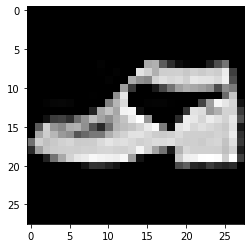

In [56]:
import matplotlib.pyplot as plt
img=X_test[23]
plt.imshow(img, cmap="gray")
plt.show()